# Objetivo:
 
- Treinar um modelo para prever se a imagem é de gato ou cachorro.

- Rodar em ambiente Linux
 
#### Dificuldades

- Encontrar os dados disponíveis, consegui um banco de imagens prontos por isso optei pelo gato e cachorro

- Configurar o tamanho das imagens de entrada no modelo

- Descobrir o tamanho ideal das imagens, maior resolução mais dados e mais processamento, nem sempre melhor resultado.

- Descobrir quantidade dos neurônios, mais neurônios não significa melhorar modelo.

- Gerenciamento de recursos, exige muitos recursos computacionais

- Otimizar o modelo, descobrir a resolução ideal sem a perda excessiva do desempenho 

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   137M      0  0:00:05  0:00:05 --:--:--  132M


In [3]:
# descompactando as amostras de imagens
!unzip -q kagglecatsanddogs_5340.zip

In [4]:
!ls

 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'


In [5]:
# acessando as pastas
!ls PetImages

Cat  Dog


In [6]:
# Filtrar imagens corrompidas
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


In [7]:
# ver todas as imagens
# import matplotlib.pyplot as plt
# import os

# # Diretório contendo as imagens
# dir_path = 'PetImages/Cat'

# # Lista de nomes das imagens
# image_list = os.listdir(dir_path)

# # Loop para exibir cada imagem
# for image_name in image_list:
#     # Caminho completo da imagem
#     image_path = os.path.join(dir_path, image_name)

#     # Carrega a imagem usando a biblioteca Matplotlib
#     image = plt.imread(image_path)

#     # Exibe a imagem usando a função imshow
#     plt.imshow(image)
#     plt.show()

batch_size depende do tamanho do conjunto de dados e do modelo que você está usando. Um batch_size muito pequeno pode levar a uma convergência lenta do modelo, enquanto um batch_size muito grande pode levar a uma convergência instável e a uma utilização excessiva de memória. Portanto, é importante encontrar um tamanho de lote adequado para seu conjunto de dados e modelo.

Algumas sugestões para escolher um tamanho de lote:

Experimente diferentes tamanhos de lote e observe o tempo de treinamento e a precisão do modelo. Comece com um tamanho de lote pequeno (por exemplo, 32) e aumente gradualmente até encontrar um tamanho de lote que produza uma precisão razoável sem consumir muita memória.

Considere o tamanho da GPU ou CPU que você está usando para treinar o modelo. Se você estiver usando uma GPU pequena, um tamanho de lote maior pode causar problemas de memória.

Considere o tamanho do conjunto de dados. Se você tiver um grande conjunto de dados, pode ser necessário usar um tamanho de lote maior para acelerar o treinamento.

Considere a complexidade do modelo. Modelos mais complexos podem precisar de tamanhos de lote maiores para treinar efetivamente.

Em resumo, não há um tamanho de lote "melhor" universal. É importante encontrar um tamanho de lote que seja adequado para o seu conjunto de dados e modelo específicos.

In [8]:
# Separando os dados de treino e validação
image_size = (250, 250)# era de 250x250
batch_size = 128 # tamanho da amostra que será utilizada em cada etapa de treinamento

treino, validacao = tf.keras.utils.image_dataset_from_directory(
    "PetImages",# arquivo mãe
    validation_split=0.2,
    subset="both",
    seed=11,
    image_size=image_size,
    batch_size=batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


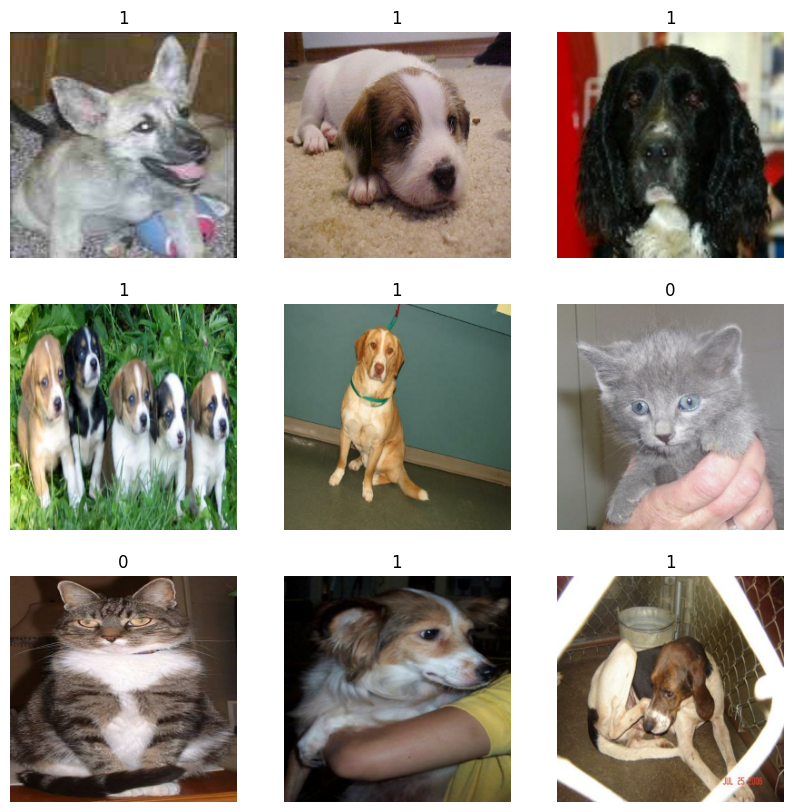

In [9]:
# vizualizando as imagens
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))# tamanho da imagem
for images, labels in treino.take(1):# pegando as de treino e seu índice
    for i in range(9): # pegando imagens
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
# gato = 0
# cachorro = 1

In [ ]:
# Transformações aleatórias (quando quiser)devido ao conjunto de dados pequenos
# data_augmentation = keras.Sequential([
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(0.1)])

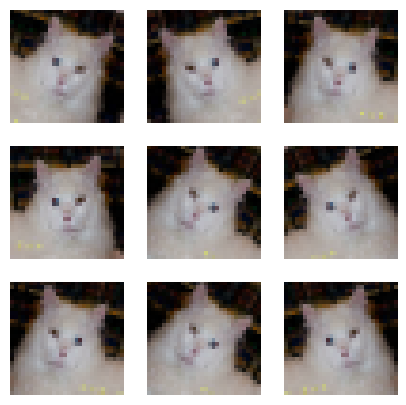

In [ ]:
# plt.figure(figsize=(5, 5))
# for images, _ in treino.take(2):
#     for i in range(9):# vizualizar 9 imagens transformadas aumentando o conjunto de dados
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

In [ ]:
# Padronizando os dados
# procurar tornar seus valores de entrada pequenos, padronizaremos os valores [0, 1]
# augmented_train_ds = treino.map(# função map
#     lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# aplicar o aumento de dados ao conjunto de dados de treinamento
# Apply data_augmentation to the training images.
# treino = treino.map(
#     lambda img, label: (data_augmentation(img), label),
#     num_parallel_calls=tf.data.AUTOTUNE
# )
# # Prefetching samples in GPU memory helps maximize GPU utilization.
# treino = treino.prefetch(tf.data.AUTOTUNE)
# validacao = validacao.prefetch(tf.data.AUTOTUNE)

Existem várias maneiras de melhorar o código em Keras para processamento de imagens:

Pré-processamento de dados: Certifique-se de que seus dados estejam bem pré-processados antes de alimentá-los para a rede neural. Normalmente, isso envolve dimensionar as imagens para o mesmo tamanho, converter as imagens em escala de cinza ou normalizar os valores de pixel para estarem entre 0 e 1.

Aumento de dados: Use técnicas de aumento de dados, como rotação, zoom, flip horizontal/vertical e deslocamento para aumentar o tamanho do conjunto de dados e tornar a rede neural mais robusta a variações nos dados.

Regularização: Use técnicas de regularização, como dropout, normalização de lote e regularização L1/L2, para evitar o overfitting e melhorar a generalização da rede neural.

Camadas convolucionais: Use várias camadas convolucionais com diferentes tamanhos de kernel para capturar padrões em diferentes escalas.

Arquitetura da rede: Experimente com diferentes arquiteturas de rede, incluindo redes mais profundas, redes mais largas, redes residuais, redes de múltiplas entradas/saídas, etc.

Função de perda: Use uma função de perda adequada para o seu problema, como a entropia cruzada para classificação ou a função de erro quadrático médio para regressão.

Otimização: Experimente com diferentes otimizadores, como SGD, Adam, RMSprop, etc., e ajuste os hiperparâmetros do otimizador, como a taxa de aprendizado e o momentum.

Monitoramento: Monitore a precisão e a perda da rede durante o treinamento e ajuste os hiperparâmetros e a arquitetura da rede com base nesses resultados.

Transferência de aprendizagem: Use modelos pré-treinados, como VGG16, Inception, ResNet, etc., como base para a sua rede e ajuste apenas os pesos das camadas finais para o seu problema específico.

Hardware: Se você estiver treinando uma rede neural muito grande ou com muitos dados, pode ser necessário usar hardware especializado, como GPUs ou TPUs, para acelerar o processo de treinamento.


In [10]:
modelo = keras.Sequential([
    # Camada de convolução com 64 filtros de 3x3 e ativação ReLU
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    keras.layers.BatchNormalization(),
    # Camada de Max Pooling com janela 2x2
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    # Camada de flatten para achatamento dos dados
    keras.layers.Flatten(),
    # Camada totalmente conectada com 512 unidades e ativação ReLU
    keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dropout(0.5),
    # Camada de saída com uma única unidade e ativação sigmoide
    keras.layers.Dense(1, activation='sigmoid')
])

Normalização de Batch: Adicionar camadas de normalização de lote (Batch Normalization) entre as camadas densas pode ajudar a acelerar o treinamento e melhorar o desempenho da rede.

Ajuste do tamanho da camada densa: Em vez de uma camada densa de 32, você pode experimentar aumentar o número de neurônios para capturar mais informações. No entanto, tenha em mente que, quanto maior a camada, mais parâmetros a rede terá, o que pode levar ao overfitting.

Uso de Função de Ativação na Camada de Saída: É importante adicionar uma função de ativação na camada de saída, dependendo do problema que você está tentando resolver. Para problemas de classificação binária, a função de ativação Sigmóide pode ser uma boa opção. Para problemas de classificação multiclasse, a função de ativação Softmax é frequentemente usada.

Aumento da complexidade da rede: Adicionar mais camadas convolucionais, camadas de pooling, camadas de dropout ou camadas densas pode ajudar a melhorar o desempenho da rede. No entanto, tenha em mente que, quanto mais complexa a rede, mais difícil será treiná-la e mais recursos computacionais ela exigirá.

Regularização: O modelo atual não possui camadas de regularização, como Dropout ou Regularização L1/L2. Adicionando essas camadas, você pode reduzir o overfitting e melhorar a generalização da rede.

A linha de código keras.layers.Conv2D(2, (3, 3), activation='relu', input_shape=(180, 180, 3)) cria uma camada convolucional 2D no Keras. Vamos analisar cada um dos argumentos:

2 é o número de filtros que serão aplicados pela camada convolucional. Cada filtro aprende a detectar um padrão específico nas imagens.

(3, 3) é o tamanho do kernel, ou janela de convolução, que desliza pela imagem para aplicar os filtros. Neste caso, o kernel tem dimensões de 3x3 pixels.

'relu' é a função de ativação que será aplicada após a convolução. A função de ativação ReLU é uma escolha comum em redes neurais convolucionais e ajuda a introduzir não-linearidade no modelo.

(180, 180, 3) é a forma da entrada esperada pela camada. Neste caso, a entrada é uma imagem com 180 pixels de largura, 180 pixels de altura e 3 canais de cor (RGB). É importante notar que esta camada deve ser a primeira camada da rede e, portanto, é necessário especificar o formato da entrada.

No geral, a camada convolucional 2D é uma das principais camadas utilizadas em redes neurais convolucionais para processar imagens. Ela aplica filtros para detectar características nas imagens e ajudar a reduzir a dimensionalidade dos dados, permitindo que as camadas posteriores da rede trabalhem com representações mais significativas das imagens. A função de ativação ReLU é frequentemente usada porque ajuda a introduzir não-linearidade no modelo, o que é importante para lidar com a complexidade das imagens.

A camada keras.layers.BatchNormalization() é uma técnica de regularização usada em redes neurais profundas para normalizar as ativações das camadas anteriores em cada batch de treinamento.

A normalização de batch envolve o cálculo da média e do desvio padrão das ativações de cada batch durante o treinamento e, em seguida, normalizar as ativações subtraindo a média e dividindo pelo desvio padrão. Essa normalização ajuda a estabilizar as distribuições de ativações em cada camada, o que pode acelerar o treinamento da rede, permitir o uso de taxas de aprendizado mais altas e ajudar a evitar o overfitting.

A camada keras.layers.BatchNormalization() é inserida entre as camadas convolucionais (ou densas) e as funções de ativação na rede neural. Ela recebe como entrada as ativações da camada anterior e normaliza as ativações em cada batch durante o treinamento. Em seguida, a camada executa uma transformação linear e adiciona uma escala e um offset para restaurar a capacidade da rede de representar funções não lineares.

A camada keras.layers.BatchNormalization() também é eficaz na redução da sensibilidade da rede à inicialização dos pesos, o que pode melhorar a estabilidade do treinamento e a capacidade da rede de generalizar para novos dados.

Em resumo, a camada de normalização de batch é uma técnica poderosa de regularização que ajuda a tornar as redes neurais mais estáveis e mais fáceis de treinar. Ela é amplamente utilizada em redes neurais profundas para melhorar o desempenho e reduzir o overfitting.

A camada keras.layers.MaxPooling2D((2, 2)) é uma camada de pooling em duas dimensões que é frequentemente usada em redes neurais convolucionais para reduzir a dimensionalidade dos dados de imagem.

A operação de pooling é uma técnica de redução de dimensionalidade que consiste em agrupar valores adjacentes em uma matriz e computar o valor máximo ou médio desse agrupamento como um valor representativo. Na camada de pooling 2D, a operação de pooling é aplicada em duas dimensões (largura e altura) em cada mapa de características da camada convolucional anterior.

O argumento (2, 2) especifica o tamanho do filtro de pooling que será aplicado em cada mapa de características. Neste caso, o tamanho do filtro é de 2x2 pixels, o que significa que o mapa de características é dividido em regiões de 2x2 pixels e o valor máximo dentro de cada região é retornado como o novo valor da região na camada de pooling.

A camada de pooling 2D ajuda a reduzir a dimensionalidade dos dados de imagem e a extrair características mais robustas e invariantes à posição das características na imagem. Ela também ajuda a reduzir o overfitting, pois reduz a quantidade de parâmetros da rede e a possibilidade de sobreajuste.

Em resumo, a camada keras.layers.MaxPooling2D() é uma técnica eficaz para reduzir a dimensionalidade dos dados de imagem e extrair características mais significativas. Ela é amplamente utilizada em redes neurais convolucionais para melhorar o desempenho e reduzir o overfitting.

A camada keras.layers.Flatten() é uma camada de pré-processamento que é frequentemente usada em redes neurais convolucionais para transformar um tensor multidimensional em um vetor unidimensional.

Em uma rede neural convolucional, os dados de entrada são geralmente imagens em formato 2D ou 3D. A camada convolucional processa as imagens e extrai características importantes. Em seguida, a camada Flatten() é usada para transformar o tensor de saída da última camada convolucional em um vetor unidimensional, que pode ser usado como entrada para uma ou mais camadas densas.

A camada Flatten() simplesmente desenrola o tensor multidimensional em uma única dimensão, preservando todos os valores de pixel da imagem. Por exemplo, se o tensor de saída da última camada convolucional tem a forma (batch_size, 4, 4, 64), onde batch_size é o tamanho do lote e 4x4x64 representa a dimensão espacial do tensor de saída, a camada Flatten() transforma o tensor em uma matriz de forma (batch_size, 1024).

Essa camada é importante porque as camadas densas exigem uma entrada unidimensional para poderem processar a informação. Sem essa camada, seria necessário usar um tensor 3D como entrada para a camada densa, o que não é possível.

Em resumo, a camada keras.layers.Flatten() é uma camada de pré-processamento essencial em redes neurais convolucionais que ajuda a transformar um tensor multidimensional em um vetor unidimensional que pode ser usado como entrada para camadas densas.

A regularização é uma técnica usada para evitar o overfitting em modelos de aprendizado de máquina. A regularização adiciona uma penalidade ao termo de perda do modelo para desencorajar os pesos de assumir valores muito grandes. Existem dois tipos comuns de regularização: L1 e L2.

A regularização L1 adiciona uma penalidade igual ao valor absoluto dos pesos à função de perda. Isso tem o efeito de encolher os pesos em direção a zero, o que pode levar a um modelo mais esparsa (ou seja, com muitos pesos iguais a zero).

A regularização L2 adiciona uma penalidade igual ao quadrado dos pesos à função de perda. Isso tem o efeito de encolher os pesos em direção a zero, mas de uma maneira mais suave do que a regularização L1. A regularização L2 é mais comum do que a regularização L1 e é frequentemente referida como “peso de decaimento”.

Você pode usar a regularização L1 ou L2 (ou uma combinação das duas) em seu modelo especificando o parâmetro kernel_regularizer ao criar as camadas do modelo.

In [11]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 248, 248, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 128)    512       
 hNormalization)                                                 
                                                        

In [12]:
epochs = 10
inicio = time.time()
modelo.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
hist = modelo.fit(treino,
    epochs=epochs,
    validation_data=validacao
)
final = time.time()
print(f'Tempo de execução: {final-inicio:.0f} segundos')

Epoch 1/10
147/147 [==============================] - 136s 766ms/step - loss: 20.9489 - accuracy: 0.6054 - val_loss: 5.4532 - val_accuracy: 0.6591
Epoch 2/10
147/147 [==============================] - 108s 724ms/step - loss: 3.0650 - accuracy: 0.6729 - val_loss: 3.8083 - val_accuracy: 0.5968
Epoch 3/10
147/147 [==============================] - 110s 741ms/step - loss: 2.9421 - accuracy: 0.6747 - val_loss: 2.5891 - val_accuracy: 0.7031
Epoch 4/10
147/147 [==============================] - 107s 717ms/step - loss: 3.1821 - accuracy: 0.6948 - val_loss: 2.7421 - val_accuracy: 0.6922
Epoch 5/10
147/147 [==============================] - 109s 734ms/step - loss: 3.2374 - accuracy: 0.7029 - val_loss: 3.1794 - val_accuracy: 0.5175
Epoch 6/10
147/147 [==============================] - 109s 732ms/step - loss: 2.7004 - accuracy: 0.7242 - val_loss: 2.4713 - val_accuracy: 0.6974
Epoch 7/10
147/147 [==============================] - 109s 726ms/step - loss: 3.1559 - accuracy: 0.7203 - val_loss: 2.4112 

In [13]:
hist.history

{'loss': [20.948928833007812,
  3.065046787261963,
  2.9420602321624756,
  3.1821048259735107,
  3.237354040145874,
  2.7003512382507324,
  3.155876874923706,
  2.3014984130859375,
  2.0718772411346436,
  2.089430809020996],
 'accuracy': [0.6053502559661865,
  0.6729496121406555,
  0.6747116446495056,
  0.6948419213294983,
  0.7028513550758362,
  0.7241563200950623,
  0.7203118205070496,
  0.7450875639915466,
  0.7593976855278015,
  0.7705574631690979],
 'val_loss': [5.453219890594482,
  3.8082571029663086,
  2.5891072750091553,
  2.742091178894043,
  3.1793556213378906,
  2.4712917804718018,
  2.4111549854278564,
  2.184823751449585,
  2.0662407875061035,
  1.791228175163269],
 'val_accuracy': [0.6591200232505798,
  0.5967535376548767,
  0.7031183242797852,
  0.6922255158424377,
  0.5175138711929321,
  0.6973515748977661,
  0.640538215637207,
  0.7387868165969849,
  0.7738146185874939,
  0.7829987406730652]}

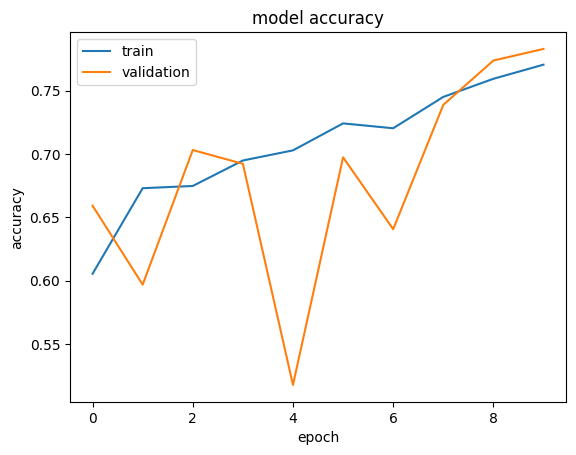

In [21]:
import matplotlib.pyplot as plt
def acuracia():
  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  #plt.savefig('modelo_acuracia.png')
  plt.show()

acuracia()

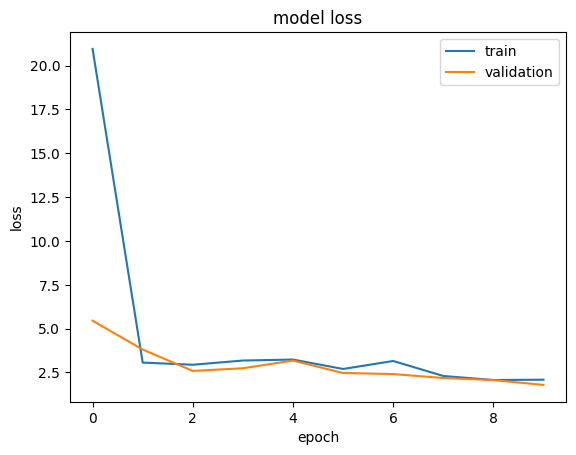

In [15]:
def loss():
  plt.plot(hist.history["loss"])
  plt.plot(hist.history["val_loss"])
  plt.title("model loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper right")
  #plt.savefig('modelo_loss.png')
  plt.show()

loss()

In [16]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/0.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = modelo.predict(img_array)
score = float(predictions[0])
print(f"Esta Imagem é {100 * (1 - score):.2f}% de gato e {100 * score:.2f}% de cachorro.")

1/1 [==============================] - 0s 264ms/step
Esta Imagem é 72.76% de gato e 27.24% de cachorro.


In [17]:
img = keras.preprocessing.image.load_img(
    "PetImages/Dog/0.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = modelo.predict(img_array)
score = float(predictions[0])
print(f"Esta Imagem é {100 * (1 - score):.2f}% de gato e {100 * score:.2f}% de cachorro.")

1/1 [==============================] - 0s 20ms/step
Esta Imagem é 25.60% de gato e 74.40% de cachorro.


In [18]:
predictions

array([[0.743961]], dtype=float32)

In [19]:
acuracia = hist.history['accuracy']
val_acu = hist.history['val_accuracy']
loss = hist.history['loss']
val_los = hist.history['val_loss']
media_acuracia = sum(acuracia)/ len(acuracia)
media_val_acu = sum(val_acu)/ len(val_acu)
media_loss = sum(loss)/ len(loss)
media_val_los = sum(val_los)/ len(val_los)
print(f'Média da acurácia: {(media_acuracia*100):.2f} %')
print('-'*50)
print(f'Média da validação da acurácia: {(media_val_acu*100):.2f} %')
print('-'*50)
print(f'Média do loss: {media_loss:.2f}')
print('-'*50)
print(f'Média da validação do loss: {media_val_los:.2f}')

Média da acurácia: 70.70 %
--------------------------------------------------
Média da validação da acurácia: 68.02 %
--------------------------------------------------
Média do loss: 4.57
--------------------------------------------------
Média da validação do loss: 2.87


O método evaluate é usado para avaliar o desempenho de um modelo de aprendizado de máquina. Ele calcula as métricas de desempenho do modelo com base nos dados de entrada fornecidos, que podem ser dados de treinamento, validação ou teste.
x é um array ou lista de arrays que contém os dados de entrada para o modelo
y é um array ou lista de arrays que contém os rótulos de classe verdadeiros para as amostras de entrada em x
batch_size é o tamanho do lote (batch) usado durante a avaliação do modelo (opcional)
O método evaluate retorna uma lista de valores que representam as métricas de desempenho calculadas para o modelo. A lista inclui a perda (loss) do modelo e outras métricas específicas, como a acurácia (accuracy), a precisão (precision), o recall (recall), o F1-score (F1-score), entre outras, dependendo do tipo de problema que o modelo está tentando resolver.

É importante lembrar que o conjunto de dados usado na avaliação não deve ser o mesmo conjunto de dados usado no treinamento, para que possamos avaliar a capacidade de generalização do modelo em relação a novos dados.

Existem vários tipos diferentes de camadas que podem ser usadas em redes neurais convolucionais (CNNs). Algumas das camadas mais comuns incluem:

Camadas convolucionais (Conv2D): Essas camadas aplicam filtros convolucionais aos dados de entrada para extrair características locais.
Camadas de pooling: Essas camadas reduzem a dimensionalidade dos dados de entrada, resumindo as informações em uma região. Existem dois tipos comuns de camadas de pooling: máximo (MaxPooling2D) e médio (AveragePooling2D). As camadas de pooling máximo selecionam o valor máximo em uma região, enquanto as camadas de pooling médio calculam a média dos valores em uma região.
Camadas totalmente conectadas (Dense): Essas camadas conectam todos os neurônios da camada anterior a todos os neurônios da camada atual. Elas são frequentemente usadas no final da rede para combinar as características extraídas pelas camadas anteriores.
Esses são apenas alguns exemplos de tipos de camadas que podem ser usados em CNNs. Existem muitos outros tipos de camadas disponíveis, e você pode experimentar diferentes combinações de camadas para encontrar a melhor arquitetura para o seu problema específico.

# Trocando MaxPooling2D para => AveragePooling2D

In [22]:
# Tentativa de novo método de camada
# trocando MaxPooling2D para => AveragePooling2D
modelo = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
epochs = 10
inicio = time.time()
modelo.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
hist = modelo.fit(treino,
    epochs=epochs,
    validation_data=validacao
)
final = time.time()
print(f'Tempo de execução: {final-inicio:.0f} segundos')

Epoch 1/10
147/147 [==============================] - 105s 689ms/step - loss: 34.0529 - accuracy: 0.6137 - val_loss: 16.7234 - val_accuracy: 0.6076
Epoch 2/10
147/147 [==============================] - 103s 689ms/step - loss: 9.4729 - accuracy: 0.6534 - val_loss: 3.5775 - val_accuracy: 0.6709
Epoch 3/10
147/147 [==============================] - 104s 695ms/step - loss: 2.4918 - accuracy: 0.6951 - val_loss: 1.8699 - val_accuracy: 0.7014
Epoch 4/10
147/147 [==============================] - 104s 695ms/step - loss: 1.8273 - accuracy: 0.7196 - val_loss: 1.8981 - val_accuracy: 0.6858
Epoch 5/10
147/147 [==============================] - 104s 695ms/step - loss: 1.7003 - accuracy: 0.7308 - val_loss: 1.5889 - val_accuracy: 0.7296
Epoch 6/10
147/147 [==============================] - 104s 699ms/step - loss: 1.5070 - accuracy: 0.7424 - val_loss: 1.5706 - val_accuracy: 0.7270
Epoch 7/10
147/147 [==============================] - 104s 696ms/step - loss: 1.5177 - accuracy: 0.7513 - val_loss: 1.6006

In [24]:
hist.history

{'loss': [34.05289840698242,
  9.47288703918457,
  2.4917755126953125,
  1.827285647392273,
  1.700307846069336,
  1.5070255994796753,
  1.5177339315414429,
  1.3838932514190674,
  1.3330131769180298,
  1.3140076398849487],
 'accuracy': [0.6137334704399109,
  0.6533532738685608,
  0.695108950138092,
  0.7195642590522766,
  0.7308308482170105,
  0.7424177527427673,
  0.7512814998626709,
  0.7645236849784851,
  0.7736544013023376,
  0.7784066796302795],
 'val_loss': [16.723386764526367,
  3.5774967670440674,
  1.869940996170044,
  1.8980764150619507,
  1.5888874530792236,
  1.5705763101577759,
  1.6005561351776123,
  1.3253464698791504,
  1.2655019760131836,
  1.2568789720535278],
 'val_accuracy': [0.6076462864875793,
  0.6708671450614929,
  0.701409637928009,
  0.6858180165290833,
  0.7296027541160583,
  0.7270397543907166,
  0.6779153943061829,
  0.7422041893005371,
  0.785561740398407,
  0.801366925239563]}

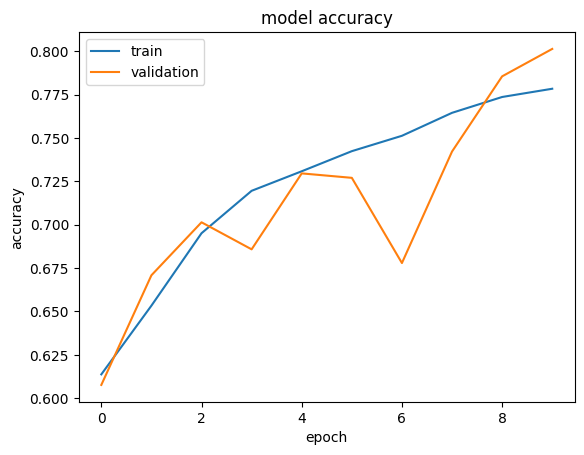

In [25]:
acuracia()

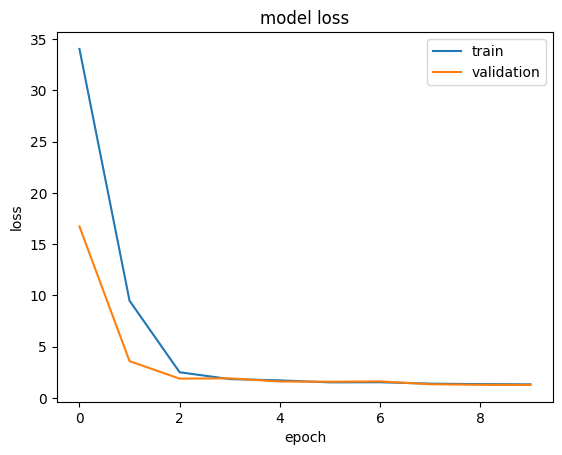

In [29]:
loss()

In [30]:
img = keras.preprocessing.image.load_img(
    "PetImages/Dog/0.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = modelo.predict(img_array)
score = float(predictions[0])
print(f"Esta Imagem é {100 * (1 - score):.2f}% de gato e {100 * score:.2f}% de cachorro.")

1/1 [==============================] - 0s 100ms/step
Esta Imagem é 36.96% de gato e 63.04% de cachorro.


In [31]:
acuracia = hist.history['accuracy']
val_acu = hist.history['val_accuracy']
loss = hist.history['loss']
val_los = hist.history['val_loss']
media_acuracia = sum(acuracia)/ len(acuracia)
media_val_acu = sum(val_acu)/ len(val_acu)
media_loss = sum(loss)/ len(loss)
media_val_los = sum(val_los)/ len(val_los)
print(f'Média da acurácia: {(media_acuracia*100):.2f} %')
print('-'*50)
print(f'Média da validação da acurácia: {(media_val_acu*100):.2f} %')
print('-'*50)
print(f'Média do loss: {media_loss:.2f}')
print('-'*50)
print(f'Média da validação do loss: {media_val_los:.2f}')

Média da acurácia: 72.23 %
--------------------------------------------------
Média da validação da acurácia: 71.29 %
--------------------------------------------------
Média do loss: 5.66
--------------------------------------------------
Média da validação do loss: 3.27


# Experimentar diferentes algoritmos de otimização

Uma maneira de melhorar o código fornecido é experimentar diferentes algoritmos de otimização em vez de apenas o "adam". O algoritmo de otimização pode ter um grande impacto na rapidez com que o modelo converge e pode melhorar a precisão do modelo.

Algumas opções de otimizadores que você pode experimentar incluem:

Stochastic Gradient Descent (SGD)
Adagrad
RMSprop
Adadelta
Nadam
Para usar um otimizador diferente, basta substituir "adam" por outro otimizador na função

In [38]:
def otimizacao(x, epocas):
    modelo = keras.Sequential([
    keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    epochs = epocas
    inicio = time.time()
    modelo.compile(
      optimizer=x,
      loss="binary_crossentropy",
      metrics=["accuracy"],
    )
    hist = modelo.fit(treino,
      epochs=epochs,
      validation_data=validacao
    )
    final = time.time()
    print(f'Tempo de execução: {final-inicio:.0f} segundos')

    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    #plt.savefig('modelo_acuracia.png')
    plt.show()

    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper right")
    #plt.savefig('modelo_loss.png')
    plt.show()

    img = keras.preprocessing.image.load_img(
      "PetImages/Dog/0.jpg", target_size=image_size
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = modelo.predict(img_array)
    score = float(predictions[0])
    print('-'*50)
    print(f"Esta Imagem é {100 * (1 - score):.2f}% de gato e {100 * score:.2f}% de cachorro.")
    print('-'*50)

    acuracia = hist.history['accuracy']
    val_acu = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_los = hist.history['val_loss']
    media_acuracia = sum(acuracia)/ len(acuracia)
    media_val_acu = sum(val_acu)/ len(val_acu)
    media_loss = sum(loss)/ len(loss)
    media_val_los = sum(val_los)/ len(val_los)
    print(f'Média da acurácia: {(media_acuracia*100):.2f} %')
    print('-'*50)
    print(f'Média da validação da acurácia: {(media_val_acu*100):.2f} %')
    print('-'*50)
    print(f'Média do loss: {media_loss:.2f}')
    print('-'*50)
    print(f'Média da validação do loss: {media_val_los:.2f}')
    print('-'*50)
    print(f'Tempo de execução: {final-inicio:.0f} segundos')

Epoch 1/5
147/147 [==============================] - 56s 349ms/step - loss: 1.5894 - accuracy: 0.5877 - val_loss: 1.0603 - val_accuracy: 0.6062
Epoch 2/5
147/147 [==============================] - 49s 315ms/step - loss: 0.9582 - accuracy: 0.6323 - val_loss: 0.8733 - val_accuracy: 0.6707
Epoch 3/5
147/147 [==============================] - 49s 321ms/step - loss: 0.8666 - accuracy: 0.6558 - val_loss: 0.9087 - val_accuracy: 0.6914
Epoch 4/5
147/147 [==============================] - 49s 321ms/step - loss: 0.8987 - accuracy: 0.6625 - val_loss: 0.7613 - val_accuracy: 0.7249
Epoch 5/5
147/147 [==============================] - 48s 318ms/step - loss: 0.9390 - accuracy: 0.6876 - val_loss: 0.8387 - val_accuracy: 0.7029
Tempo de execução: 284 segundos


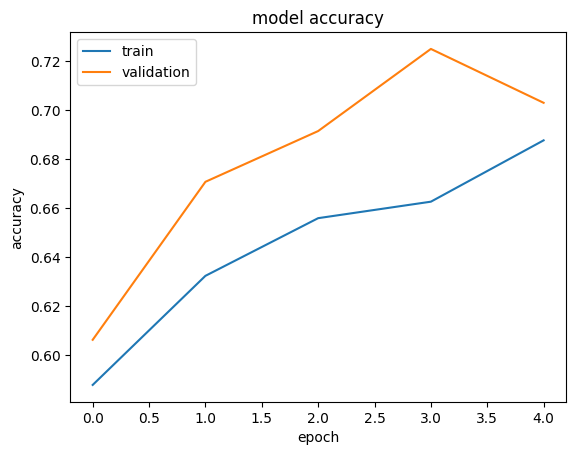

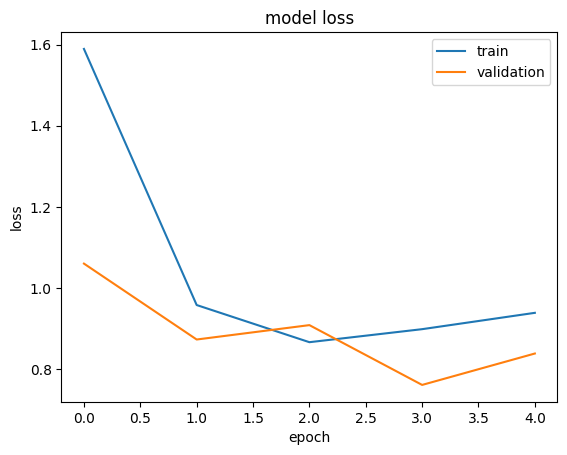

1/1 [==============================] - 0s 145ms/step
--------------------------------------------------
Esta Imagem é 35.73% de gato e 64.27% de cachorro.
--------------------------------------------------
Média da acurácia: 64.52 %
--------------------------------------------------
Média da validação da acurácia: 67.92 %
--------------------------------------------------
Média do loss: 1.05
--------------------------------------------------
Média da validação do loss: 0.89


In [35]:
otimizacao('adam', 5)

Epoch 1/5
147/147 [==============================] - 50s 319ms/step - loss: 2.0090 - accuracy: 0.5824 - val_loss: 1.9009 - val_accuracy: 0.6047
Epoch 2/5
147/147 [==============================] - 49s 320ms/step - loss: 1.8760 - accuracy: 0.6389 - val_loss: 1.8449 - val_accuracy: 0.6542
Epoch 3/5
147/147 [==============================] - 48s 320ms/step - loss: 1.8203 - accuracy: 0.6763 - val_loss: 1.8124 - val_accuracy: 0.6679
Epoch 4/5
147/147 [==============================] - 49s 322ms/step - loss: 1.7646 - accuracy: 0.7050 - val_loss: 1.7816 - val_accuracy: 0.6762
Epoch 5/5
147/147 [==============================] - 47s 310ms/step - loss: 1.7185 - accuracy: 0.7256 - val_loss: 1.7560 - val_accuracy: 0.6828
Tempo de execução: 344 segundos


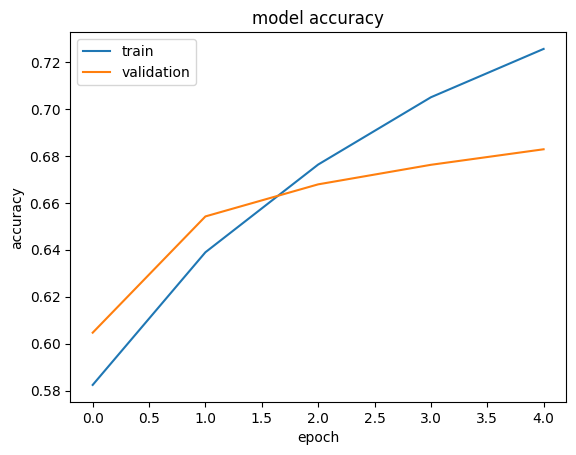

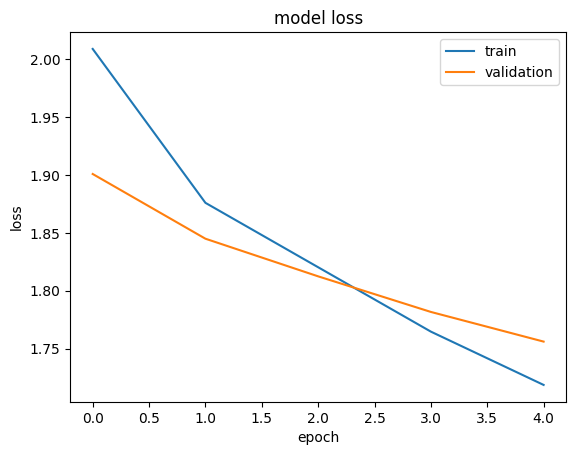

1/1 [==============================] - 0s 89ms/step
--------------------------------------------------
Esta Imagem é 52.31% de gato e 47.69% de cachorro.
--------------------------------------------------
Média da acurácia: 66.56 %
--------------------------------------------------
Média da validação da acurácia: 65.72 %
--------------------------------------------------
Média do loss: 1.84
--------------------------------------------------
Média da validação do loss: 1.82


In [36]:
# Otimizador Adagrad
otimizacao('Adagrad', 5)

In [ ]:
# Testando com Stochastic Gradient Descent (SGD)
otimizacao('SGD', 5)

Epoch 1/5
147/147 [==============================] - 52s 322ms/step - loss: 1.4304 - accuracy: 0.5648 - val_loss: 0.8607 - val_accuracy: 0.6032
Epoch 2/5
147/147 [==============================] - 49s 327ms/step - loss: 0.9017 - accuracy: 0.6210 - val_loss: 1.1210 - val_accuracy: 0.5660
Epoch 3/5
147/147 [==============================] - 49s 322ms/step - loss: 0.8890 - accuracy: 0.6618 - val_loss: 0.8545 - val_accuracy: 0.6749
Epoch 4/5
147/147 [==============================] - 49s 325ms/step - loss: 0.8865 - accuracy: 0.6979 - val_loss: 0.8653 - val_accuracy: 0.7087
Epoch 5/5
147/147 [==============================] - 50s 330ms/step - loss: 0.8976 - accuracy: 0.7278 - val_loss: 0.9857 - val_accuracy: 0.6232
Tempo de execução: 345 segundos


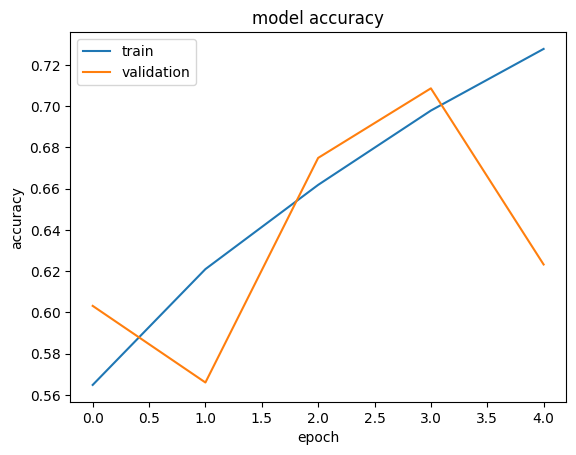

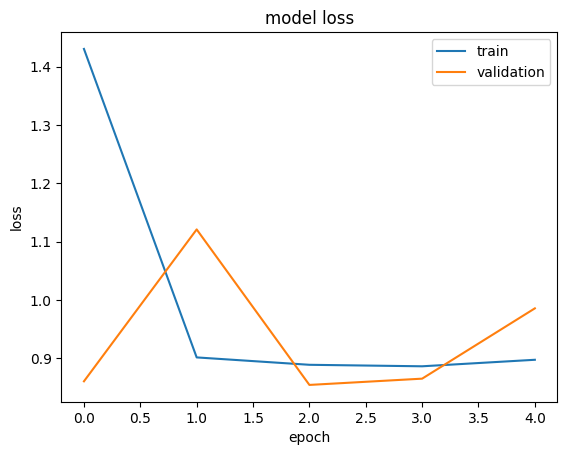

1/1 [==============================] - 0s 90ms/step
--------------------------------------------------
Esta Imagem é 21.66% de gato e 78.34% de cachorro.
--------------------------------------------------
Média da acurácia: 65.47 %
--------------------------------------------------
Média da validação da acurácia: 63.52 %
--------------------------------------------------
Média do loss: 1.00
--------------------------------------------------
Média da validação do loss: 0.94
--------------------------------------------------
Tempo de execução: 345 segundos


In [39]:
# Otimizador RMSprop
otimizacao('RMSprop', 5)

In [ ]:
# Otimizador Adadelta
otimizacao('Adadelta', 5)

Epoch 1/5
147/147 [==============================] - 53s 321ms/step - loss: 1.4981 - accuracy: 0.5955 - val_loss: 1.0103 - val_accuracy: 0.6450
Epoch 2/5
147/147 [==============================] - 49s 324ms/step - loss: 0.9435 - accuracy: 0.6631 - val_loss: 0.9252 - val_accuracy: 0.6869
Epoch 3/5
147/147 [==============================] - 48s 321ms/step - loss: 0.8779 - accuracy: 0.6857 - val_loss: 0.8971 - val_accuracy: 0.6852
Epoch 4/5
147/147 [==============================] - 61s 410ms/step - loss: 0.8649 - accuracy: 0.7001 - val_loss: 0.8201 - val_accuracy: 0.7416
Epoch 5/5
147/147 [==============================] - 49s 322ms/step - loss: 0.8265 - accuracy: 0.7114 - val_loss: 0.8258 - val_accuracy: 0.7388
Tempo de execução: 314 segundos


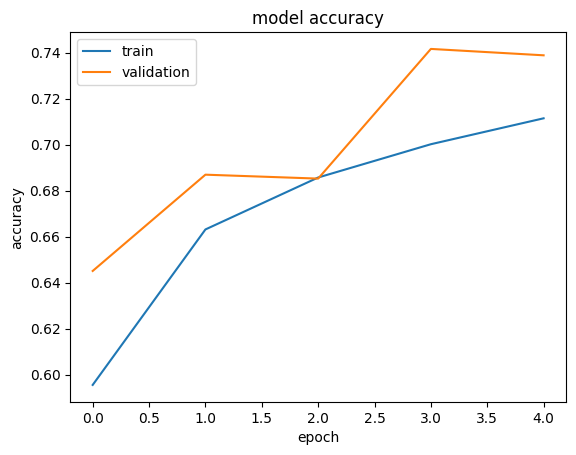

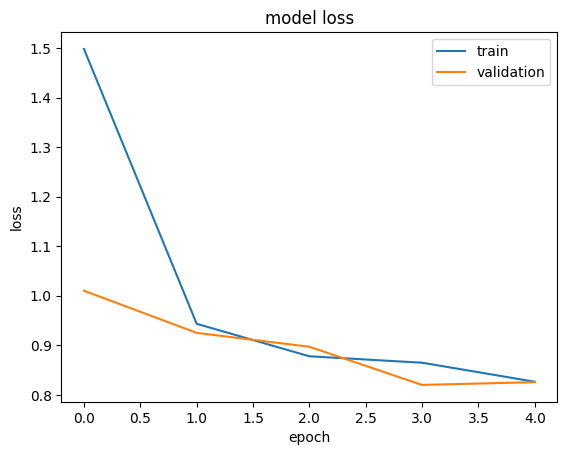

1/1 [==============================] - 0s 141ms/step
--------------------------------------------------
Esta Imagem é 49.99% de gato e 50.01% de cachorro.
--------------------------------------------------
Média da acurácia: 67.11 %
--------------------------------------------------
Média da validação da acurácia: 69.95 %
--------------------------------------------------
Média do loss: 1.00
--------------------------------------------------
Média da validação do loss: 0.90
--------------------------------------------------
Tempo de execução: 314 segundos


In [40]:
# Otimizador Nadam
otimizacao('Nadam', 5)

Uma maneira de melhorar o código fornecido é experimentar diferentes funções de perda em vez de apenas a "binary_crossentropy". Em alguns casos, diferentes funções de perda podem ser mais adequadas para o seu problema em comparação com a "binary_crossentropy".

Algumas opções de funções de perda que você pode experimentar incluem:

Mean Squared Error (MSE)
Mean Absolute Error (MAE)
Categorical Crossentropy
Sparse Categorical Crossentropy
Hinge Loss
Para usar uma função de perda diferente, basta substituir "binary_crossentropy" por outra função de perda na função "compile", por exemplo:
Lembre-se de escolher uma função de perda que seja adequada para o seu problema. Por exemplo, se você estiver trabalhando em um problema de regressão, a MSE ou a MAE podem ser mais adequadas do que a "binary_crossentropy". Se você estiver trabalhando em um problema de classificação de várias classes, a Categorical Crossentropy ou a Sparse Categorical Crossentropy podem ser mais adequadas.

transformar as imagens em um array numpy acelera o modelo keras
Sim, converter as imagens em um array numpy pode acelerar o treinamento do modelo no Keras, principalmente se você estiver usando o Tensorflow como backend.

Existem algumas razões pelas quais isso pode acelerar o treinamento do modelo:

O processamento de imagens é muito mais rápido em arrays numpy do que em imagens individuais. Ao converter todas as imagens em arrays numpy, você pode tirar proveito da velocidade de processamento de arrays numpy.

O Keras e o Tensorflow são altamente otimizados para trabalhar com arrays numpy. Ao usar arrays numpy como entrada para o modelo, você pode tirar proveito dessas otimizações.

A conversão de imagens para arrays numpy pode ser feita antes do treinamento, permitindo que você pré-processe seus dados e otimize sua entrada para o modelo antes do treinamento começar. Isso pode ajudar a acelerar o treinamento do modelo e melhorar sua precisão.

Porém, tenha em mente que a conversão de imagens em arrays numpy também pode levar a um consumo de memória maior, dependendo do tamanho do conjunto de dados. É importante equilibrar a velocidade de processamento com o uso de memória ao trabalhar com grandes conjuntos de dados.

Para transformar todas as imagens em um array numpy, você pode usar a biblioteca OpenCV, que é uma das bibliotecas mais populares para processamento de imagens em Python. A seguir, um exemplo de código que pode ser usado:

In [4]:
# criando pasta provisória com o colab
# !mkdir PetImages_numpy
# criando pasta provisória com o jupyter notebook
import os
os.mkdir('PetImages_numpy')

In [5]:
#!ls PetImages_numpy
!dir PetImages_numpy

 O volume na unidade C não tem nome.
 O Número de Série do Volume é 5298-0D5A

 Pasta de C:\Users\otaci\Projetos - Data Science\Deep Learning - Keras - Tensorflow\Classificação - Imagens - Keras\PetImages_numpy

25/07/2023  15:54    <DIR>          .
25/07/2023  15:54    <DIR>          ..
               0 arquivo(s)              0 bytes
               2 pasta(s)   329.001.418.752 bytes disponíveis


# Transformando e normalizando as imagens em ARRAY NUMPY


In [10]:
# imagems dos gatos
import cv2
import os
import numpy as np

# Define o tamanho da imagem desejada
IMG_SIZE = 30

# Define o caminho para o diretório que contém as imagens
data_dir = "PetImages/Cat"

# Cria uma lista para armazenar as imagens padronizadas e seus rótulos
images = []
labels = []

# Loop sobre os arquivos de imagem no diretório
for file in os.listdir(data_dir):
    # Extrai o rótulo do nome do arquivo
    label = 0  # rótulo definido como "0" para as imagens de gatos

    # Carrega a imagem usando OpenCV
    img = cv2.imread(os.path.join(data_dir, file))

    # Verifica se a imagem foi carregada com sucesso
    if img is not None:
        # Redimensiona a imagem para o tamanho desejado usando a função resize do OpenCV
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Converte a imagem em um array numpy
        img = np.asarray(img)

        # Normaliza a imagem dividindo cada pixel pelo valor máximo de pixel (255)
        img = img / 255.0

        # Adiciona a imagem e o rótulo às listas de imagens e rótulos
        images.append(img)
        labels.append(label)
    else:
        print("Erro ao carregar a imagem:", file)

# Converte as listas de imagens e rótulos em arrays numpy
cat_imagens = np.array(images)
cat_labels = np.array(labels)

np.save('PetImages_numpy/cat_imagens.npy', cat_imagens)
np.save('PetImages_numpy/cat_labels.npy', cat_labels)

Erro ao carregar a imagem: Thumbs.db


In [11]:
# imagem dos cachorros

# Define o caminho para o diretório que contém as imagens
data_dir = "PetImages/Dog"

# Cria uma lista para armazenar as imagens padronizadas e seus rótulos
images = []
labels = []

# Loop sobre os arquivos de imagem no diretório
for file in os.listdir(data_dir):
    # Extrai o rótulo do nome do arquivo
    label = 1  # rótulo definido como "1" para as imagens de cachorros

    # Carrega a imagem usando OpenCV
    img = cv2.imread(os.path.join(data_dir, file))

    # Verifica se a imagem foi carregada com sucesso
    if img is not None:
        # Redimensiona a imagem para o tamanho desejado usando a função resize do OpenCV
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Converte a imagem em um array numpy
        img = np.asarray(img)

        # Normaliza a imagem dividindo cada pixel pelo valor máximo de pixel (255)
        img = img / 255.0

        # Adiciona a imagem e o rótulo às listas de imagens e rótulos
        images.append(img)
        labels.append(label)
    else:
        print("Erro ao carregar a imagem:", file)

# Converte as listas de imagens e rótulos em arrays numpy
dog_imagens = np.array(images)
dog_labels = np.array(labels)

np.save('PetImages_numpy/dog_imagens.npy', dog_imagens)
np.save('PetImages_numpy/dog_labels.npy', dog_labels)

Erro ao carregar a imagem: Thumbs.db


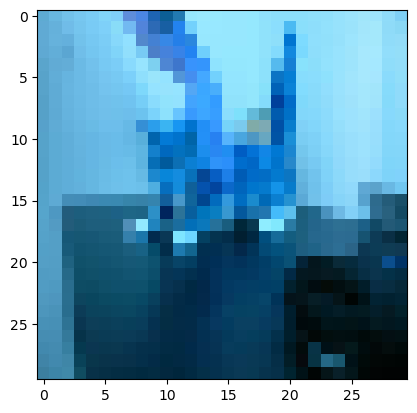

In [13]:
plt.imshow(cat_imagens[0])

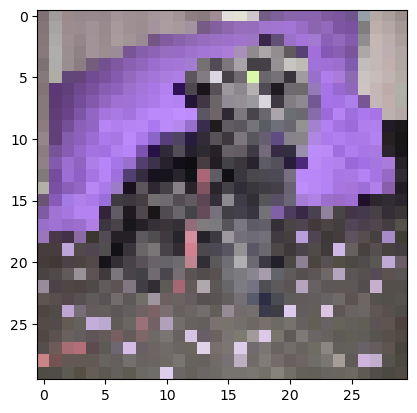

In [14]:
plt.imshow(dog_imagens[0])

O código acima percorre um diretório que contém imagens em formato JPG ou PNG, converte cada imagem em um array numpy usando a função "cv2.imread", e adiciona cada array numpy à lista "img_list". Depois, ele converte a lista de arrays numpy em um único array numpy usando a função "np.array", e imprime a forma (shape) do array numpy resultante.

In [ ]:
import numpy as np
cat_imagens = np.load('PetImages_numpy/cat_imagens.npy', allow_pickle=True)
dog_imagens = np.load('PetImages_numpy/dog_imagens.npy', allow_pickle=True)
cat_labels = np.load('PetImages_numpy/cat_labels.npy', allow_pickle=True)
dog_labels = np.load('PetImages_numpy/dog_labels.npy', allow_pickle=True)

In [ ]:
# # Criar os rótulos correspondentes para as imagens de gato e cachorro
# cat_labels = np.zeros(len(cat_imagens))
# dog_labels = np.ones(len(dog_imagens))

In [ ]:
# Juntar as imagens e os rótulos em um único conjunto de dados
imagens = np.concatenate((cat_imagens, dog_imagens), axis=0)
labels = np.concatenate((cat_labels, dog_labels), axis=0)

In [ ]:
# Criar um gerador de dados de imagem para pré-processar as imagens e gerar lotes de treinamento
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Dividir os dados em conjuntos de treinamento e validação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagens, labels, test_size=0.2, random_state=42)

In [ ]:
# # Verificar o tamanho dos conjuntos de treinamento e validação
# print("Tamanho do conjunto de treinamento:", len(train_images))
# print("Tamanho do conjunto de validação:", len(val_images))
# print("Tamanho do conjunto de treinamento:", train_images.shape)
# print("Tamanho do conjunto de validação:", val_images.shape)

In [ ]:
# # Criar o iterador de treinamento usando o gerador de dados de imagem
# treino = datagen.flow(train_images, train_labels, batch_size=32)

# # Criar o iterador de validação usando o gerador de dados de imagem
# validacao = datagen.flow(val_images, val_labels, batch_size=32)

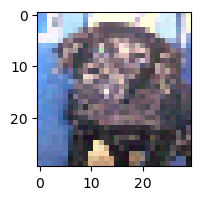

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

Text(0.5, 1.0, '1')

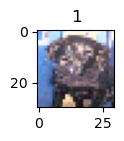

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0])
plt.title(y_train[0])
# colocando o valor da figura no caso 1 significa cachorro

Text(0.5, 1.0, '0')

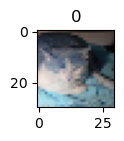

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[2000])
plt.title(y_train[2000])
# colocando o valor da figura no caso 0 significa gato

In [ ]:
# 0 => gato
# 1 => cachorro

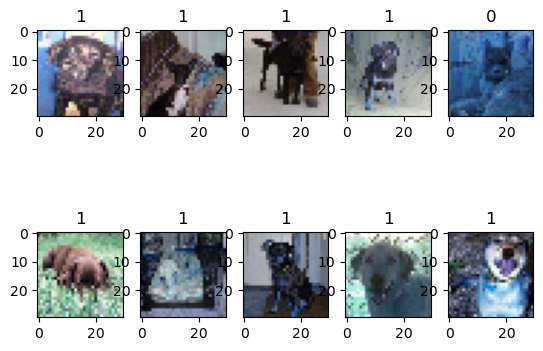

In [ ]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)# 2 linhas 5 colunas e itere sobre todas as imagens
    plt.imshow(X_train[imagem])
    plt.title(y_train[imagem])

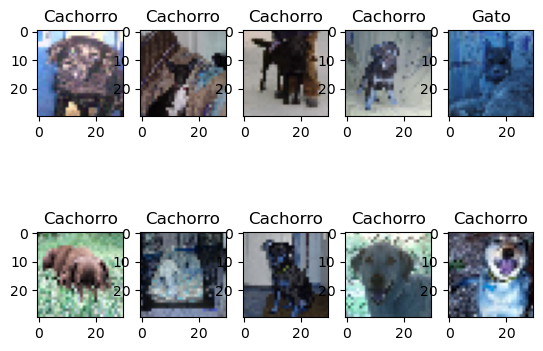

In [ ]:
# dar um nome de verdade as identificações(quando não vem no dataset)
nomes_de_classificacoes = ['Gato', 'Cachorro']

for imagem in range(10):
    plt.subplot(2, 5, imagem+1)# 2 linhas 5 colunas e itere sobre todas as imagens
    plt.imshow(X_train[imagem])
    plt.title(nomes_de_classificacoes[y_train[imagem]])

A VGG16 e a ResNet são duas arquiteturas populares de redes neurais convolucionais utilizadas em tarefas de visão computacional.

A VGG16 é uma rede neural convolucional profunda com 16 camadas, desenvolvida em 2014 pelo grupo Visual Geometry Group (VGG) da Universidade de Oxford. A arquitetura da VGG16 é composta por uma sequência de camadas convolucionais com filtros de tamanho 3x3 e pooling máximo com janelas de tamanho 2x2, seguidas por três camadas totalmente conectadas. A VGG16 é conhecida por ser uma arquitetura simples e fácil de implementar, mas com um grande número de parâmetros, o que pode tornar o treinamento demorado e requerer muito poder computacional.

A ResNet (Rede Neural de Resíduos) é uma arquitetura de rede neural convolucional profunda que utiliza conexões residuais para permitir a adição de camadas sem afetar o desempenho da rede. Foi desenvolvida em 2015 pelo Microsoft Research Asia. A ResNet é composta por várias camadas residuais, cada uma com uma conexão direta entre a entrada e a saída da camada, além de outras camadas convolucionais e de pooling. Essas conexões residuais permitem que a rede aprenda mais facilmente representações complexas de características de imagem, tornando-a menos suscetível a problemas de desvanecimento de gradiente.

Em geral, a ResNet é mais profunda e mais complexa do que a VGG16, com um número menor de parâmetros, o que pode tornar o treinamento mais eficiente. A escolha entre a VGG16 e a ResNet depende do tamanho e complexidade do conjunto de dados e do problema específico que você está tentando resolver.

In [ ]:
# import tensorflow
# modelo = keras.Sequential([
#     keras.layers.Flatten(input_shape=(180,180,3)),# 180x180pixels
#     keras.layers.Dense(32, activation=tensorflow.nn.relu),
#     keras.layers.Dense(64, activation=tensorflow.nn.relu),
#     keras.layers.Dense(128, activation=tensorflow.nn.relu),
#     keras.layers.Dropout(0.5),# sempre colocar múltiplos de 2 # uma camada com 256 # função relu
#     keras.layers.Dense(2, activation=tensorflow.nn.softmax)# 10 classificacoes, ou nomes dos itens nas imagens exemplo = sapato
# ])

A LeNet-5 é uma arquitetura de rede neural convolucional desenvolvida em 1998 pelo pesquisador Yann LeCun e seus colegas, sendo uma das primeiras redes neurais convolucionais bem-sucedidas a serem aplicadas a tarefas de reconhecimento de caracteres manuscritos.

A arquitetura da LeNet-5 é composta por sete camadas: duas camadas convolucionais, duas camadas de subamostragem (ou pooling), seguidas por três camadas totalmente conectadas. A primeira camada convolucional é responsável por extrair características de baixo nível, como arestas e contornos, enquanto a segunda camada convolucional extrai características mais complexas e abstratas, como formas e padrões. As camadas de subamostragem reduzem o tamanho das características, permitindo que a rede se concentre nas informações mais importantes. As camadas totalmente conectadas na parte final da rede usam as características extraídas para fazer a classificação.

Embora a LeNet-5 seja uma arquitetura relativamente simples em comparação com as redes neurais convolucionais modernas, ela foi uma das primeiras a demonstrar a eficácia das convoluções para tarefas de visão computacional e inspirou muitas das arquiteturas mais avançadas que foram desenvolvidas posteriormente. A LeNet-5 também foi usada como base para redes neurais convolucionais aplicadas a tarefas como reconhecimento de objetos em imagens e detecção de objetos em tempo real.

Ambas as funções de perda (loss functions) sparse_categorical_crossentropy e binary_crossentropy são utilizadas em problemas de classificação em deep learning com o Keras, mas elas têm finalidades diferentes.

A função binary_crossentropy é comumente usada para problemas de classificação binária, em que há apenas duas classes, como, por exemplo, prever se uma imagem contém um gato ou um cachorro. Neste caso, a rede neural terá apenas uma saída com um valor entre 0 e 1, que representa a probabilidade de pertencer a uma das duas classes. A função de perda binary_crossentropy calcula a diferença entre as previsões da rede neural e as classes reais, levando em conta a probabilidade estimada de cada classe.

Já a função sparse_categorical_crossentropy é usada para problemas de classificação com mais de duas classes, em que há três ou mais classes, como, por exemplo, classificar imagens de dígitos de 0 a 9. Neste caso, a rede neural terá várias saídas, cada uma representando a probabilidade de pertencer a uma das classes. A função sparse_categorical_crossentropy é similar à categorical_crossentropy, mas lida com as classes em um formato diferente. Ela espera que as classes sejam representadas como inteiros, em vez de serem codificadas em vetores one-hot.

Em resumo, a diferença entre binary_crossentropy e sparse_categorical_crossentropy é que a primeira é usada para problemas de classificação binária e a segunda é usada para problemas de classificação com mais de duas classes, em que as classes são representadas como inteiros.

In [ ]:
import time
def otimizacao_numpy(x):

  from tensorflow import keras
  modelo = keras.Sequential([
  keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 3)),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
  keras.layers.Conv2D(256, (3, 3), activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')
    ])

  epochs = 15
  inicio = time.time()
  modelo.compile(
      optimizer=x,
      loss="binary_crossentropy",
      metrics=["accuracy"],
  )
  hist = modelo.fit(x=X_train,y=y_train,
      epochs=epochs,
      validation_data=(X_test, y_test)
  )
  final = time.time()
  print(f'Tempo de execução: {final-inicio:.0f} segundos')

  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  #plt.savefig('modelo_acuracia.png')
  plt.show()

  plt.plot(hist.history["loss"])
  plt.plot(hist.history["val_loss"])
  plt.title("model loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper right")
  #plt.savefig('modelo_loss.png')
  plt.show()

  acuracia = hist.history['accuracy']
  val_acu = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_los = hist.history['val_loss']
  media_acuracia = sum(acuracia)/ len(acuracia)
  media_val_acu = sum(val_acu)/ len(val_acu)
  media_loss = sum(loss)/ len(loss)
  media_val_los = sum(val_los)/ len(val_los)
  print(f'Média da acurácia: {(media_acuracia*100):.2f} %')
  print('-'*50)
  print(f'Média da validação da acurácia: {(media_val_acu*100):.2f} %')
  print('-'*50)
  print(f'Média do loss: {media_loss:.2f}')
  print('-'*50)
  print(f'Média da validação do loss: {media_val_los:.2f}')
  print('')

  # testando com os dados de teste
  perda_teste, acuracia_teste = modelo.evaluate(X_test, y_test)
  print('-'*50)
  print(f'Evaluate com os dados de TESTE: \nPerda => {perda_teste:.2f} \nAcurácia => {acuracia_teste*100:.2f} %')
  print('-'*50)

Epoch 1/15
586/586 [==============================] - 130s 217ms/step - loss: 2.4460 - accuracy: 0.6460 - val_loss: 0.9124 - val_accuracy: 0.6218
Epoch 2/15
586/586 [==============================] - 135s 230ms/step - loss: 0.7025 - accuracy: 0.7131 - val_loss: 0.6873 - val_accuracy: 0.7054
Epoch 3/15
586/586 [==============================] - 145s 248ms/step - loss: 0.6010 - accuracy: 0.7526 - val_loss: 0.5756 - val_accuracy: 0.7562
Epoch 4/15
586/586 [==============================] - 109s 185ms/step - loss: 0.5581 - accuracy: 0.7702 - val_loss: 0.5935 - val_accuracy: 0.7422
Epoch 5/15
586/586 [==============================] - 111s 189ms/step - loss: 0.5397 - accuracy: 0.7820 - val_loss: 0.5441 - val_accuracy: 0.7866
Epoch 6/15
586/586 [==============================] - 112s 191ms/step - loss: 0.5141 - accuracy: 0.8017 - val_loss: 0.5276 - val_accuracy: 0.7804
Epoch 7/15
586/586 [==============================] - 136s 231ms/step - loss: 0.5009 - accuracy: 0.8136 - val_loss: 0.6590 -

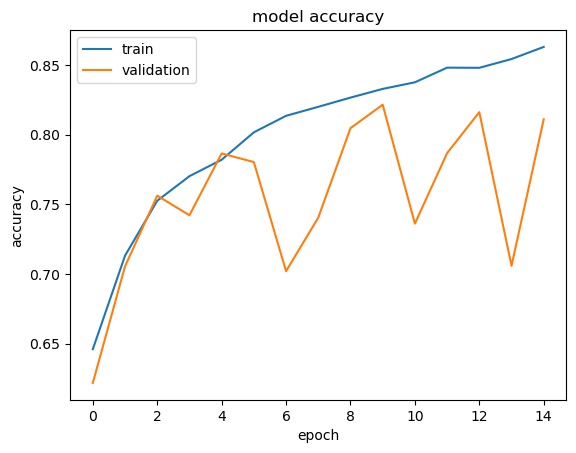

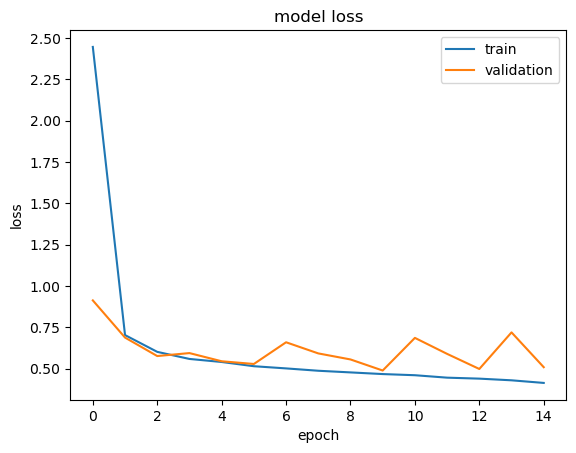

Média da acurácia: 80.07 %
--------------------------------------------------
Média da validação da acurácia: 75.45 %
--------------------------------------------------
Média do loss: 0.63
--------------------------------------------------
Média da validação do loss: 0.61

147/147 [==============================] - 6s 39ms/step - loss: 0.5081 - accuracy: 0.8111
--------------------------------------------------
Evaluate com os dados de TESTE: 
Perda => 0.51 
Acurácia => 81.11 %
--------------------------------------------------


In [ ]:
# # Otimizador 'Adam'
otimizacao_numpy('adam')

Epoch 1/15
586/586 [==============================] - 140s 234ms/step - loss: 6.8116 - accuracy: 0.5999 - val_loss: 6.0038 - val_accuracy: 0.6497
Epoch 2/15
586/586 [==============================] - 132s 225ms/step - loss: 5.4204 - accuracy: 0.6536 - val_loss: 4.9675 - val_accuracy: 0.5915
Epoch 3/15
586/586 [==============================] - 112s 191ms/step - loss: 4.3856 - accuracy: 0.6840 - val_loss: 3.9344 - val_accuracy: 0.7065
Epoch 4/15
586/586 [==============================] - 150s 256ms/step - loss: 3.5671 - accuracy: 0.7041 - val_loss: 3.1814 - val_accuracy: 0.7434
Epoch 5/15
586/586 [==============================] - 135s 230ms/step - loss: 2.9248 - accuracy: 0.7219 - val_loss: 2.7953 - val_accuracy: 0.6559
Epoch 6/15
586/586 [==============================] - 149s 253ms/step - loss: 2.4178 - accuracy: 0.7306 - val_loss: 2.2435 - val_accuracy: 0.7116
Epoch 7/15
586/586 [==============================] - 123s 211ms/step - loss: 2.0059 - accuracy: 0.7445 - val_loss: 1.7996 -

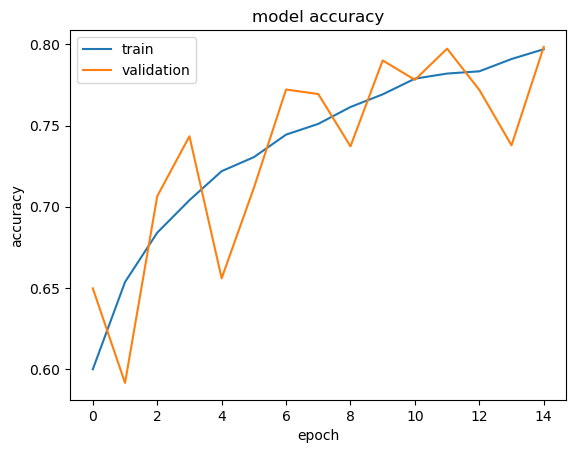

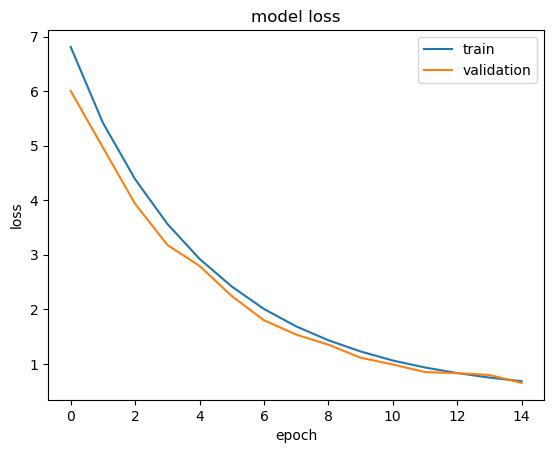

Média da acurácia: 73.69 %
--------------------------------------------------
Média da validação da acurácia: 73.41 %
--------------------------------------------------
Média do loss: 2.41
--------------------------------------------------
Média da validação do loss: 2.20

147/147 [==============================] - 5s 36ms/step - loss: 0.6499 - accuracy: 0.7985
--------------------------------------------------
Evaluate com os dados de TESTE: 
Perda => 0.65 
Acurácia => 79.85 %
--------------------------------------------------


In [ ]:
# # Otimizador 'SGD'
otimizacao_numpy('SGD')

Epoch 1/15
586/586 [==============================] - 116s 195ms/step - loss: 7.4660 - accuracy: 0.5817 - val_loss: 7.1038 - val_accuracy: 0.5930
Epoch 2/15
586/586 [==============================] - 121s 207ms/step - loss: 6.9029 - accuracy: 0.6136 - val_loss: 6.5755 - val_accuracy: 0.6950
Epoch 3/15
586/586 [==============================] - 138s 236ms/step - loss: 6.4950 - accuracy: 0.6349 - val_loss: 6.2301 - val_accuracy: 0.7003
Epoch 4/15
586/586 [==============================] - 123s 210ms/step - loss: 6.1554 - accuracy: 0.6418 - val_loss: 5.9222 - val_accuracy: 0.7078
Epoch 5/15
586/586 [==============================] - 119s 204ms/step - loss: 5.8512 - accuracy: 0.6483 - val_loss: 5.6329 - val_accuracy: 0.7133
Epoch 6/15
586/586 [==============================] - 112s 192ms/step - loss: 5.5761 - accuracy: 0.6577 - val_loss: 5.3749 - val_accuracy: 0.7197
Epoch 7/15
586/586 [==============================] - 52083s 89s/step - loss: 5.3084 - accuracy: 0.6707 - val_loss: 5.1266 -

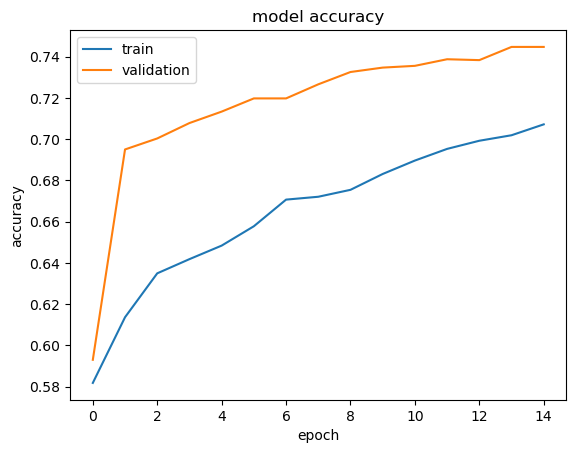

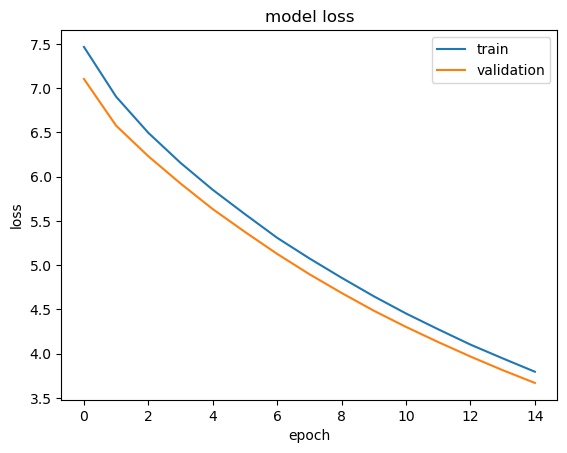

Média da acurácia: 66.48 %
--------------------------------------------------
Média da validação da acurácia: 71.63 %
--------------------------------------------------
Média do loss: 5.26
--------------------------------------------------
Média da validação do loss: 5.06

147/147 [==============================] - 5s 35ms/step - loss: 3.6687 - accuracy: 0.7447
--------------------------------------------------
Evaluate com os dados de TESTE: 
Perda => 3.67 
Acurácia => 74.47 %
--------------------------------------------------


In [ ]:
# Otimizador Adagrad
otimizacao_numpy('Adagrad')

Epoch 1/15
586/586 [==============================] - 106s 179ms/step - loss: 2.0117 - accuracy: 0.6358 - val_loss: 0.7079 - val_accuracy: 0.6649
Epoch 2/15
586/586 [==============================] - 104s 177ms/step - loss: 0.6080 - accuracy: 0.7340 - val_loss: 0.6195 - val_accuracy: 0.7180
Epoch 3/15
586/586 [==============================] - 104s 177ms/step - loss: 0.5382 - accuracy: 0.7718 - val_loss: 0.5297 - val_accuracy: 0.7861
Epoch 4/15
586/586 [==============================] - 105s 179ms/step - loss: 0.5043 - accuracy: 0.7909 - val_loss: 0.5795 - val_accuracy: 0.7430
Epoch 5/15
586/586 [==============================] - 104s 177ms/step - loss: 0.4777 - accuracy: 0.8089 - val_loss: 0.4650 - val_accuracy: 0.8158
Epoch 6/15
586/586 [==============================] - 104s 178ms/step - loss: 0.4572 - accuracy: 0.8177 - val_loss: 0.5400 - val_accuracy: 0.7635
Epoch 7/15
586/586 [==============================] - 104s 178ms/step - loss: 0.4447 - accuracy: 0.8282 - val_loss: 0.4932 -

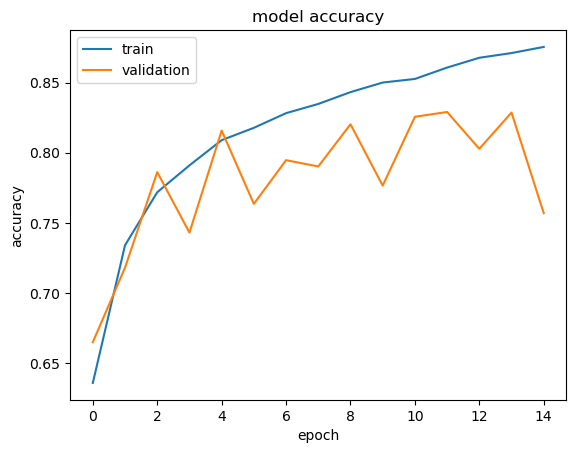

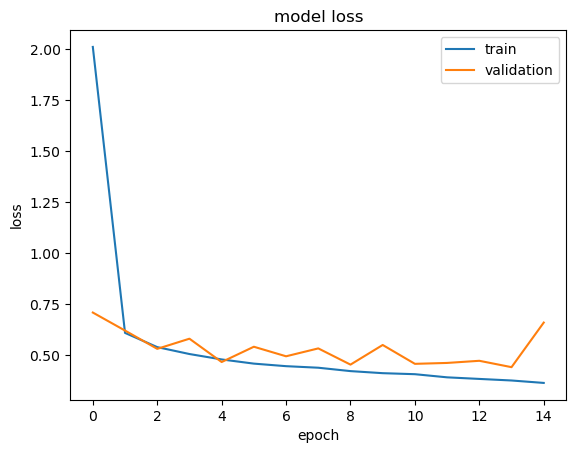

Média da acurácia: 81.62 %
--------------------------------------------------
Média da validação da acurácia: 78.11 %
--------------------------------------------------
Média do loss: 0.55
--------------------------------------------------
Média da validação do loss: 0.53

147/147 [==============================] - 5s 33ms/step - loss: 0.6587 - accuracy: 0.7569
--------------------------------------------------
Evaluate com os dados de TESTE: 
Perda => 0.66 
Acurácia => 75.69 %
--------------------------------------------------


In [ ]:
# Otimizador RMSprop
otimizacao_numpy('RMSprop')

Epoch 1/15
586/586 [==============================] - 108s 181ms/step - loss: 8.1053 - accuracy: 0.5038 - val_loss: 7.5192 - val_accuracy: 0.5261
Epoch 2/15
586/586 [==============================] - 102s 173ms/step - loss: 8.0090 - accuracy: 0.5198 - val_loss: 7.4881 - val_accuracy: 0.5669
Epoch 3/15
586/586 [==============================] - 101s 172ms/step - loss: 7.9416 - accuracy: 0.5255 - val_loss: 7.4499 - val_accuracy: 0.5797
Epoch 4/15
586/586 [==============================] - 102s 174ms/step - loss: 7.8946 - accuracy: 0.5304 - val_loss: 7.4144 - val_accuracy: 0.5902
Epoch 5/15
586/586 [==============================] - 101s 173ms/step - loss: 7.8236 - accuracy: 0.5403 - val_loss: 7.3818 - val_accuracy: 0.6030
Epoch 6/15
586/586 [==============================] - 103s 176ms/step - loss: 7.7967 - accuracy: 0.5410 - val_loss: 7.3487 - val_accuracy: 0.6109
Epoch 7/15
586/586 [==============================] - 103s 175ms/step - loss: 7.7215 - accuracy: 0.5504 - val_loss: 7.3166 -

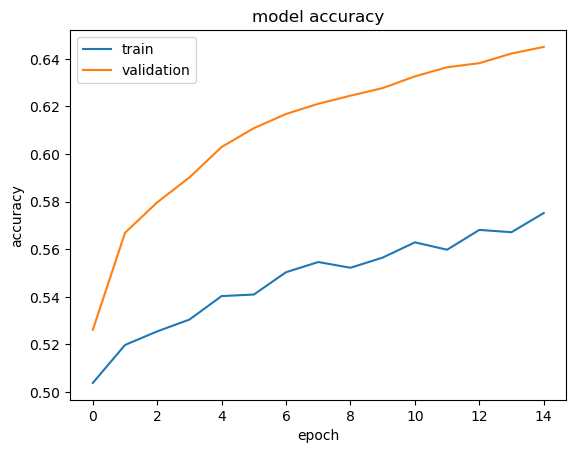

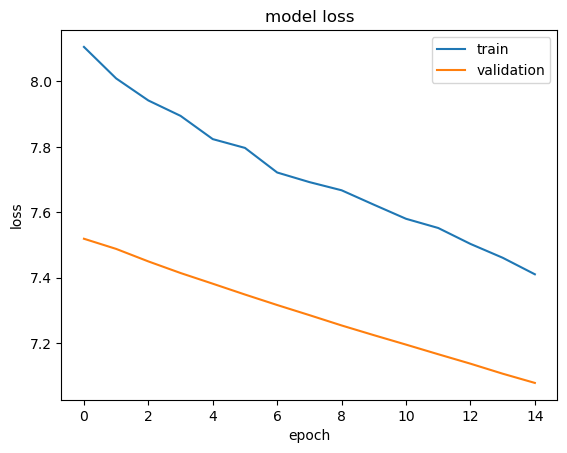

Média da acurácia: 54.72 %
--------------------------------------------------
Média da validação da acurácia: 61.08 %
--------------------------------------------------
Média do loss: 7.72
--------------------------------------------------
Média da validação do loss: 7.29

147/147 [==============================] - 5s 33ms/step - loss: 7.0786 - accuracy: 0.6450
--------------------------------------------------
Evaluate com os dados de TESTE: 
Perda => 7.08 
Acurácia => 64.50 %
--------------------------------------------------


In [ ]:
# Otimizador Adadelta
otimizacao_numpy('Adadelta')

Epoch 1/15
586/586 [==============================] - 125s 204ms/step - loss: 2.5210 - accuracy: 0.6432 - val_loss: 0.8247 - val_accuracy: 0.7054
Epoch 2/15
586/586 [==============================] - 123s 211ms/step - loss: 0.6911 - accuracy: 0.7161 - val_loss: 0.6130 - val_accuracy: 0.7603
Epoch 3/15
586/586 [==============================] - 128s 218ms/step - loss: 0.5968 - accuracy: 0.7547 - val_loss: 0.6987 - val_accuracy: 0.6813
Epoch 4/15
586/586 [==============================] - 127s 217ms/step - loss: 0.5543 - accuracy: 0.7724 - val_loss: 0.6131 - val_accuracy: 0.7281
Epoch 5/15
586/586 [==============================] - 136s 232ms/step - loss: 0.5272 - accuracy: 0.7915 - val_loss: 0.5365 - val_accuracy: 0.7720
Epoch 6/15
586/586 [==============================] - 149s 254ms/step - loss: 0.5105 - accuracy: 0.8007 - val_loss: 0.5485 - val_accuracy: 0.7787
Epoch 7/15
586/586 [==============================] - 165s 282ms/step - loss: 0.4952 - accuracy: 0.8109 - val_loss: 0.4946 -

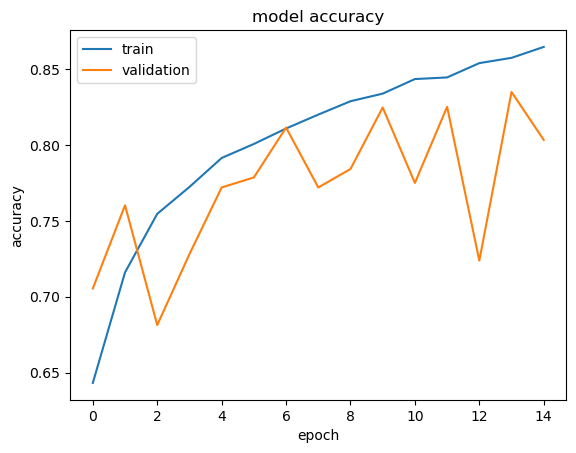

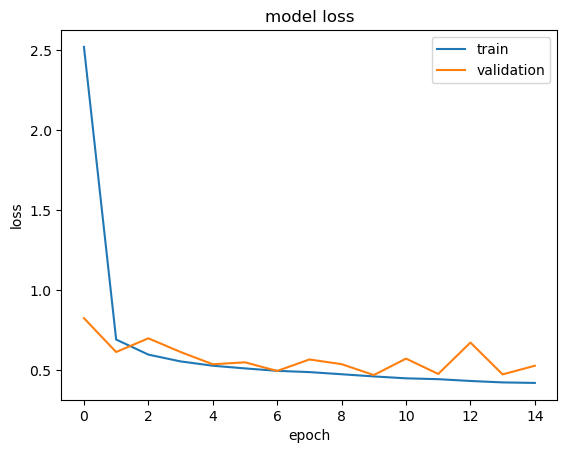

Média da acurácia: 80.24 %
--------------------------------------------------
Média da validação da acurácia: 77.21 %
--------------------------------------------------
Média do loss: 0.63
--------------------------------------------------
Média da validação do loss: 0.57

147/147 [==============================] - 6s 38ms/step - loss: 0.5272 - accuracy: 0.8034
--------------------------------------------------
Evaluate com os dados de TESTE: 
Perda => 0.53 
Acurácia => 80.34 %
--------------------------------------------------


In [ ]:
# Otimizador Nadam
otimizacao_numpy('Nadam')

OTIMIZADOR =====> adam <=====
Epoch 1/2
586/586 [==============================] - 103s 173ms/step - loss: 2.4882 - accuracy: 0.6404 - val_loss: 1.0453 - val_accuracy: 0.5831
Epoch 2/2
586/586 [==============================] - 110s 187ms/step - loss: 0.7007 - accuracy: 0.7105 - val_loss: 0.6724 - val_accuracy: 0.7025
Tempo de execução: 213 segundos


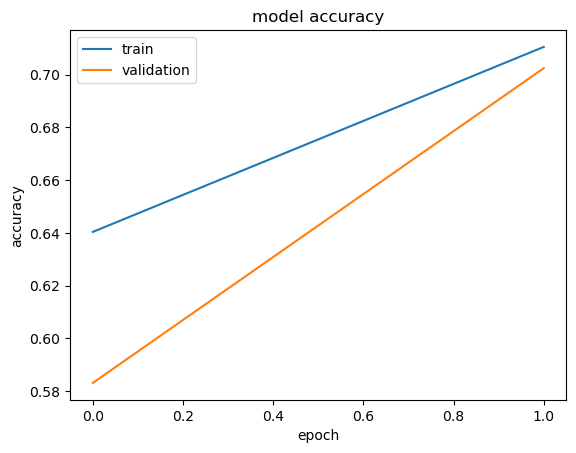

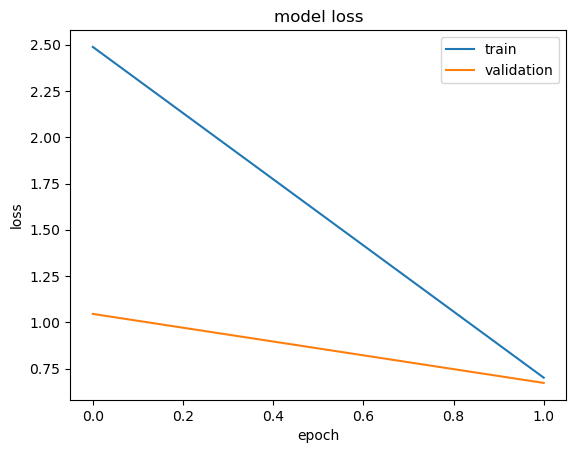

Média da acurácia: 67.55 %
--------------------------------------------------
Média da validação da acurácia: 64.28 %
--------------------------------------------------
Média do loss: 1.59
--------------------------------------------------
Média da validação do loss: 0.86

147/147 [==============================] - 6s 42ms/step - loss: 0.6724 - accuracy: 0.7025
--------------------------------------------------
Evaluate com os dados de Treinamento: 
Perda => 0.67 
Acurácia => 70.25 %
--------------------------------------------------
OTIMIZADOR =====> SGD <=====
Epoch 1/2
586/586 [==============================] - 116s 195ms/step - loss: 6.8267 - accuracy: 0.5907 - val_loss: 5.9909 - val_accuracy: 0.6753
Epoch 2/2
586/586 [==============================] - 104s 177ms/step - loss: 5.4289 - accuracy: 0.6520 - val_loss: 4.9701 - val_accuracy: 0.6147
Tempo de execução: 220 segundos


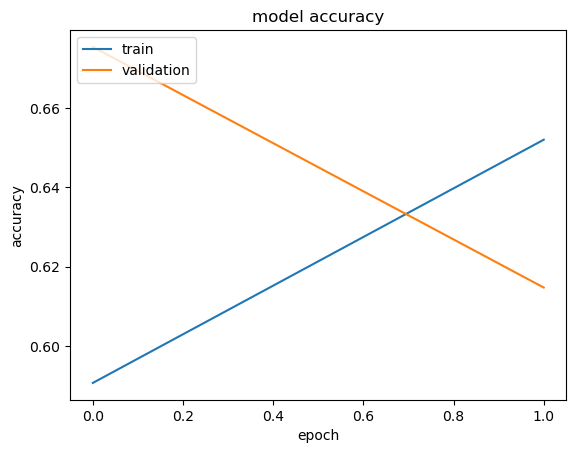

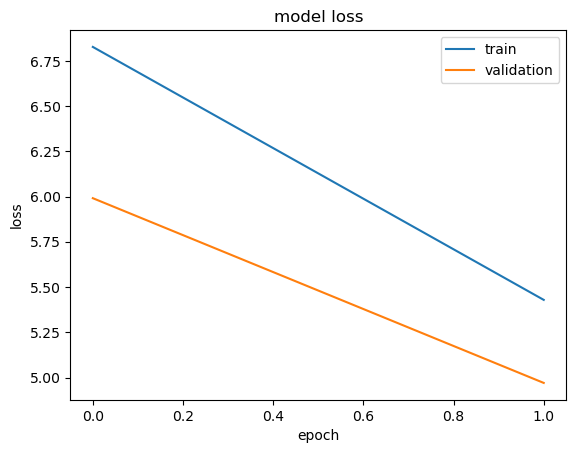

Média da acurácia: 62.13 %
--------------------------------------------------
Média da validação da acurácia: 64.50 %
--------------------------------------------------
Média do loss: 6.13
--------------------------------------------------
Média da validação do loss: 5.48

147/147 [==============================] - 5s 36ms/step - loss: 4.9701 - accuracy: 0.6147
--------------------------------------------------
Evaluate com os dados de Treinamento: 
Perda => 4.97 
Acurácia => 61.47 %
--------------------------------------------------
OTIMIZADOR =====> Adagrad <=====
Epoch 1/2
586/586 [==============================] - 119s 201ms/step - loss: 7.4706 - accuracy: 0.5810 - val_loss: 7.0574 - val_accuracy: 0.6094
Epoch 2/2
586/586 [==============================] - 111s 190ms/step - loss: 6.8843 - accuracy: 0.6229 - val_loss: 6.5635 - val_accuracy: 0.6892
Tempo de execução: 231 segundos


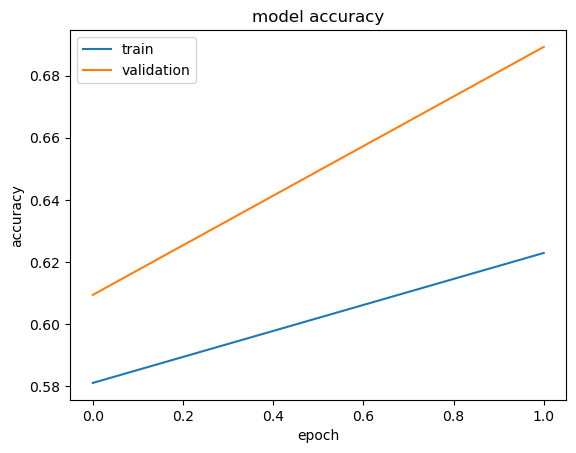

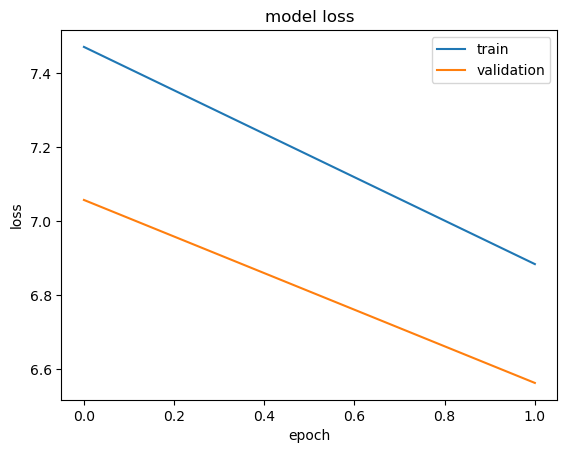

Média da acurácia: 60.20 %
--------------------------------------------------
Média da validação da acurácia: 64.93 %
--------------------------------------------------
Média do loss: 7.18
--------------------------------------------------
Média da validação do loss: 6.81

147/147 [==============================] - 5s 33ms/step - loss: 6.5635 - accuracy: 0.6892
--------------------------------------------------
Evaluate com os dados de Treinamento: 
Perda => 6.56 
Acurácia => 68.92 %
--------------------------------------------------
OTIMIZADOR =====> Adadelta <=====
Epoch 1/2
586/586 [==============================] - 123s 207ms/step - loss: 8.0051 - accuracy: 0.4987 - val_loss: 7.5307 - val_accuracy: 0.5197
Epoch 2/2
586/586 [==============================] - 120s 205ms/step - loss: 7.9243 - accuracy: 0.5192 - val_loss: 7.4761 - val_accuracy: 0.5554
Tempo de execução: 244 segundos


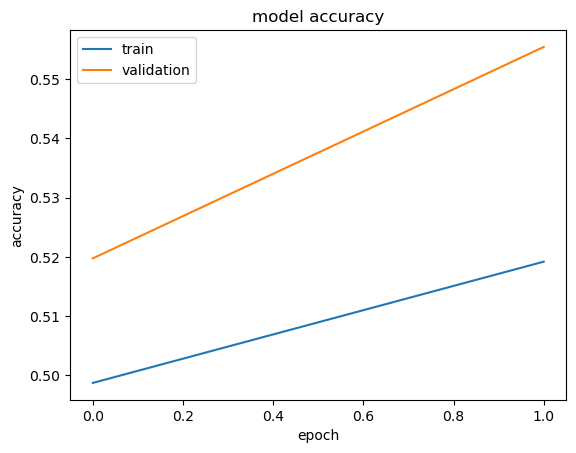

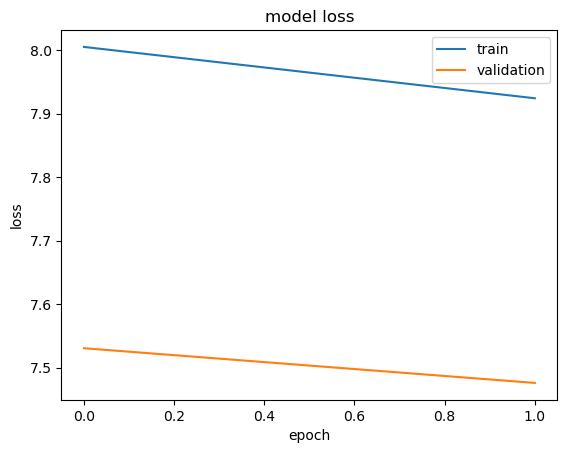

Média da acurácia: 50.90 %
--------------------------------------------------
Média da validação da acurácia: 53.76 %
--------------------------------------------------
Média do loss: 7.96
--------------------------------------------------
Média da validação do loss: 7.50

147/147 [==============================] - 5s 32ms/step - loss: 7.4761 - accuracy: 0.5554
--------------------------------------------------
Evaluate com os dados de Treinamento: 
Perda => 7.48 
Acurácia => 55.54 %
--------------------------------------------------
OTIMIZADOR =====> Nadam <=====
Epoch 1/2
586/586 [==============================] - 125s 207ms/step - loss: 2.5942 - accuracy: 0.6424 - val_loss: 0.9030 - val_accuracy: 0.6448
Epoch 2/2
586/586 [==============================] - 125s 213ms/step - loss: 0.7035 - accuracy: 0.7165 - val_loss: 0.8753 - val_accuracy: 0.5761
Tempo de execução: 250 segundos


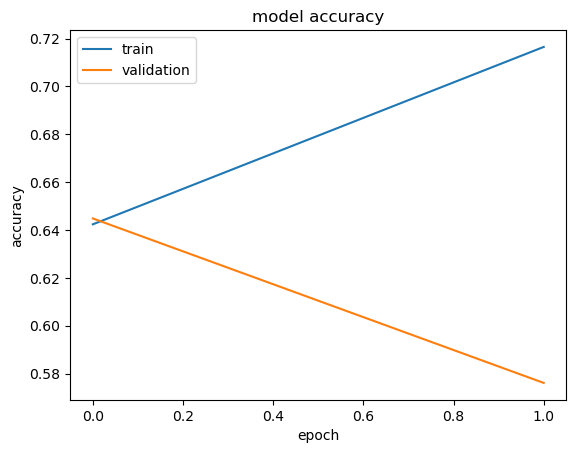

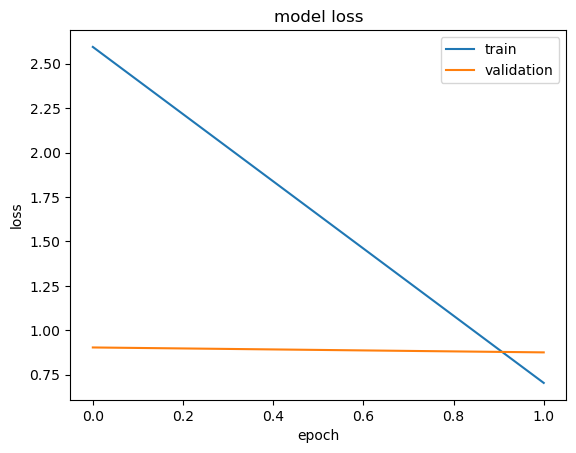

Média da acurácia: 67.94 %
--------------------------------------------------
Média da validação da acurácia: 61.05 %
--------------------------------------------------
Média do loss: 1.65
--------------------------------------------------
Média da validação do loss: 0.89

147/147 [==============================] - 8s 53ms/step - loss: 0.8753 - accuracy: 0.5761
--------------------------------------------------
Evaluate com os dados de Treinamento: 
Perda => 0.88 
Acurácia => 57.61 %
--------------------------------------------------


In [ ]:
# se quiser rodar tudo de uma vez
lista = ['adam', 'SGD', 'Adagrad','RMSprop','Adadelta','Nadam']

for i in range(6):
    print(f'OTIMIZADOR =====> {lista[i]} <=====')
    otimizacao_numpy(lista[i])

# Convertendo as imagens para cinza

Transformar as imagens em tons de cinza pode acelerar o treinamento do modelo em algumas situações. Há algumas razões para isso:

As imagens em tons de cinza têm apenas um canal de cor, enquanto as imagens em RGB têm três canais de cor. Como resultado, as imagens em tons de cinza são geralmente menores em tamanho do que as imagens em RGB, o que significa que exigem menos memória para serem armazenadas e processadas. Isso pode resultar em um treinamento mais rápido do modelo e também pode permitir o treinamento em conjunto de dados maiores.

Em alguns casos, as informações de cor nas imagens podem não ser relevantes para a tarefa de classificação em questão. Nesses casos, usar apenas as informações de intensidade dos pixels pode ser suficiente para a tarefa e pode levar a uma precisão de classificação igual ou melhor do que usando a imagem colorida completa. Isso pode ser especialmente verdadeiro se as imagens em cores tiverem ruído ou se as cores não fornecerem informações adicionais relevantes para a classificação.

No entanto, tenha em mente que em algumas tarefas de classificação de imagem, a cor pode fornecer informações importantes para a tarefa, e nesses casos, usar imagens em tons de cinza pode prejudicar a precisão do modelo. Além disso, transformar as imagens em tons de cinza pode não acelerar significativamente o treinamento em todos os casos, dependendo do tamanho do conjunto de dados e da complexidade do modelo. Portanto, é sempre importante avaliar os resultados e testar diferentes abordagens para encontrar a melhor solução para a sua tarefa de classificação de imagem.

Converter uma imagem colorida para escala de cinza pode diminuir a quantidade de memória necessária para armazenar a imagem e, consequentemente, pode reduzir a quantidade de memória necessária para treinar um modelo no Keras. Isso ocorre porque as imagens em escala de cinza possuem apenas um canal de cor (um único valor de intensidade de brilho por pixel), enquanto as imagens coloridas possuem três canais de cor (vermelho, verde e azul), o que ocupa mais memória.

No entanto, é importante lembrar que a conversão para escala de cinza também pode reduzir a quantidade de informações disponíveis na imagem, o que pode afetar negativamente o desempenho do modelo. Portanto, a escolha de usar imagens em escala de cinza ou coloridas depende do problema específico e do conjunto de dados em questão.

In [ ]:
!pip install opencv-python

In [ ]:
# Convertendo as imagens originais para cinza (Gato)
# precisa criar a pasta PetImages_cinza e subpastas dog e cat
import cv2
import os

# Define o caminho para o diretório contendo as imagens originais
input_dir = 'PetImages/Cat'

# Define o caminho para o diretório onde as imagens em escala de cinza serão salvas
output_dir = 'PetImages_cinza/Cat/'

# Cria o diretório de saída se ele ainda não existir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop pelas imagens no diretório de entrada
for filename in os.listdir(input_dir):
    # Lê a imagem original em cores
    img = cv2.imread(os.path.join(input_dir, filename))

    # Converte a imagem para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Salva a imagem em escala de cinza no diretório de saída com o mesmo nome da imagem original
    cv2.imwrite(os.path.join(output_dir, filename), gray_img)

print('Finalizado a conversão das imagens originais de gato para escala de cinza')

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# Convertendo as imagens originais para cinza (Cachorro)
import cv2
import os

# Define o caminho para o diretório contendo as imagens originais
input_dir = 'PetImages/Dog'

# Define o caminho para o diretório onde as imagens em escala de cinza serão salvas
output_dir = 'PetImages_cinza/Dog'

# Cria o diretório de saída se ele ainda não existir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop pelas imagens no diretório de entrada
for filename in os.listdir(input_dir):
    # Lê a imagem original em cores
    img = cv2.imread(os.path.join(input_dir, filename))

    # Converte a imagem para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Salva a imagem em escala de cinza no diretório de saída com o mesmo nome da imagem original
    cv2.imwrite(os.path.join(output_dir, filename), gray_img)
print('Finalizado a conversão das imagens originais de cachorro para escala de cinza')

In [ ]:
# Filtrar imagens corrompidas
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages_cinza", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

In [ ]:
# verificando se possui erros de codificação nas imagens cinzas
from PIL import Image
import os

dir_path = "PetImages_cinza/Cat"

for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        try:
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            img.close()
        except Exception as e:
            print("Erro ao abrir a imagem", img_path)
            print(e)

In [ ]:
# Separando os dados de treino e validação
image_size = (30, 180)# era de 180x180
batch_size = 32 # tamanho da amostra que será utilizada em cada etapa de treinamento(128,1280)

treino, validacao = tf.keras.utils.image_dataset_from_directory(
    "PetImages_cinza",# arquivo mãe
    validation_split=0.2,
    subset="both",
    seed=11,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale'
)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 88: invalid continuation byte

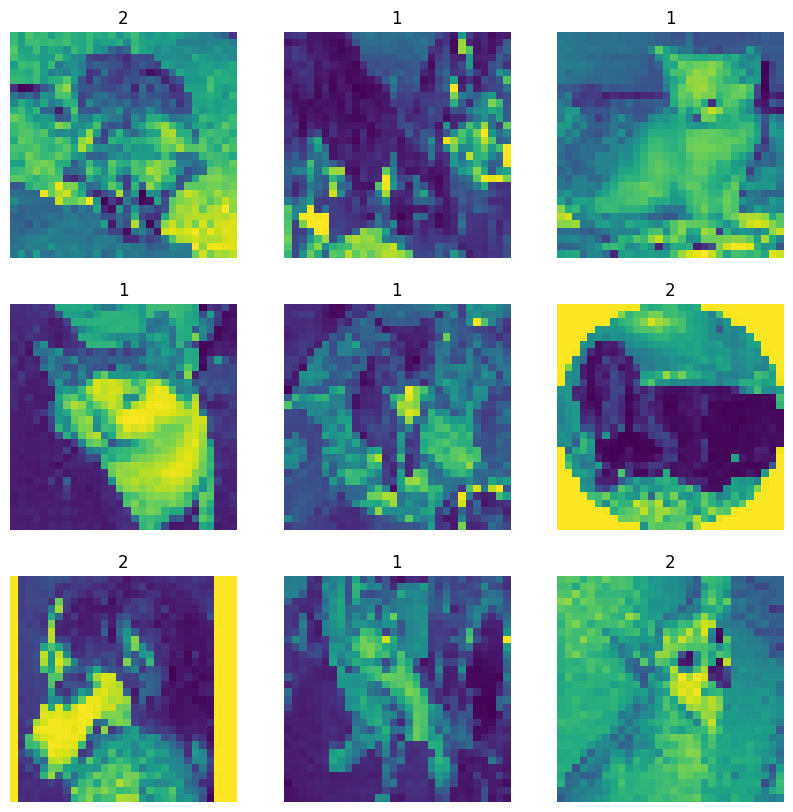

In [ ]:
# vizualizando as imagens
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))# tamanho da imagem
for images, labels in treino.take(1):# pegando as de treino e seu índice
    for i in range(9): # pegando 9 imagens
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
# Transformações aleatórias devido ao conjunto de dados pequenos
data_augmentation = keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1)])

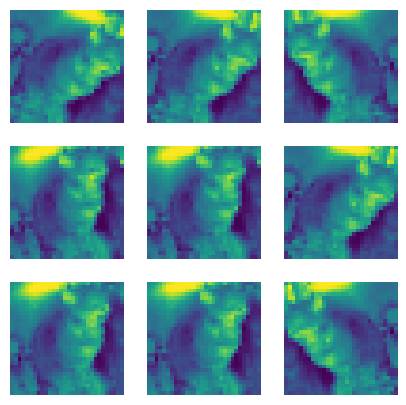

In [ ]:
plt.figure(figsize=(5, 5))
for images, _ in treino.take(2):
    for i in range(9):# vizualizar 9 imagens transformadas aumentando o conjunto de dados
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
# Padronizando os dados
# procurar tornar seus valores de entrada pequenos, padronizaremos os valores [0, 1]
augmented_train_ds = treino.map(# função map
    lambda x, y: (data_augmentation(x, training=True), y))

"Aplicar o aumento de dados ao conjunto de dados de treinamento" significa que um conjunto de técnicas de processamento de imagem será usado para aumentar a variedade e quantidade de dados no conjunto de treinamento. Isso é feito para melhorar o desempenho do modelo de aprendizado de máquina, tornando-o mais robusto a variações nos dados.

O código fornecido realiza essa tarefa para as imagens do conjunto de treinamento. A função data_augmentation é aplicada a cada imagem, e a saída é combinada com sua etiqueta correspondente. Isso é feito usando a função map do TensorFlow. O argumento num_parallel_calls indica que o mapeamento deve ser feito em paralelo, utilizando o número de chamadas automático para a plataforma em uso.

Além disso, o código realiza prefetching do conjunto de treinamento e validação para maximizar a utilização da GPU durante o treinamento. O conjunto de treinamento é prefetchado com o mesmo valor tf.data.AUTOTUNE para que o TensorFlow possa determinar dinamicamente o número ideal de elementos para serem pré-carregados na memória da GPU, enquanto o conjunto de validação é prefetchado com o mesmo valor para carregar o próximo lote de dados enquanto o modelo está sendo treinado com o lote atual.

In [ ]:
# aplicar o aumento de dados ao conjunto de dados de treinamento
# Apply data_augmentation to the training images.
treino = treino.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
treino = treino.prefetch(tf.data.AUTOTUNE)
validacao = validacao.prefetch(tf.data.AUTOTUNE)

In [ ]:
# construindo um modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import tensorflow

In [ ]:
modelo = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 1)),# Quando coloca a escala de cinza possui somente 1 dimensão
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Testando com Stochastic Gradient Descent (SGD)
def otimizacao_cinza(x):
  epochs = epocas
  inicio = time.time()
  modelo.compile(
      optimizer=x,
      loss="binary_crossentropy",
      metrics=["accuracy"],
  )
  hist = modelo.fit(treino,
      epochs=15,
      validation_data=validacao
  )
  final = time.time()
  print(f'Tempo de execução: {final-inicio:.0f} segundos')

  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  #plt.savefig('modelo_acuracia.png')
  plt.show()

  plt.plot(hist.history["loss"])
  plt.plot(hist.history["val_loss"])
  plt.title("model loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper right")
  #plt.savefig('modelo_loss.png')
  plt.show()

  # img = keras.preprocessing.image.load_img(
  #     "PetImages_cinza/Dog/0.jpg", target_size=image_size
  # )
  # img_array = keras.preprocessing.image.img_to_array(img)
  # img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  # predictions = modelo.predict(img_array)
  # score = float(predictions[0])
  # print('-'*50)
  # print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")
  print('-'*50)

  acuracia = hist.history['accuracy']
  val_acu = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_los = hist.history['val_loss']
  media_acuracia = sum(acuracia)/ len(acuracia)
  media_val_acu = sum(val_acu)/ len(val_acu)
  media_loss = sum(loss)/ len(loss)
  media_val_los = sum(val_los)/ len(val_los)
  print(f'Média da acurácia: {(media_acuracia*100):.2f} %')
  print('-'*50)
  print(f'Média da validação da acurácia: {(media_val_acu*100):.2f} %')
  print('-'*50)
  print(f'Média do loss: {media_loss:.2f}')
  print('-'*50)
  print(f'Média da validação do loss: {media_val_los:.2f}')

Epoch 1/2
224/224 [==============================] - 16s 66ms/step - loss: -19353112.0000 - accuracy: 0.5064 - val_loss: -26017564.0000 - val_accuracy: 0.4849
Epoch 2/2
224/224 [==============================] - 14s 64ms/step - loss: -22914936.0000 - accuracy: 0.5064 - val_loss: -31488450.0000 - val_accuracy: 0.4849
Tempo de execução: 37 segundos


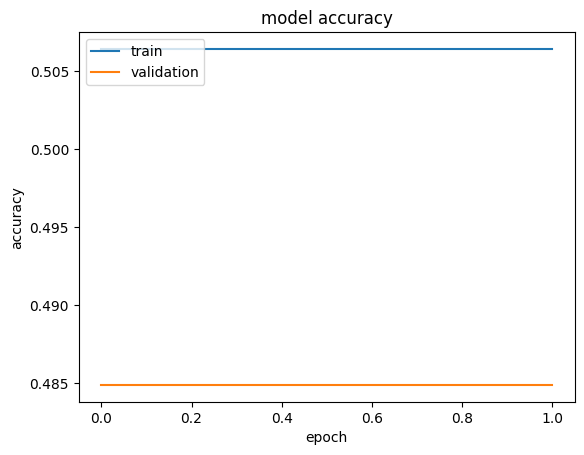

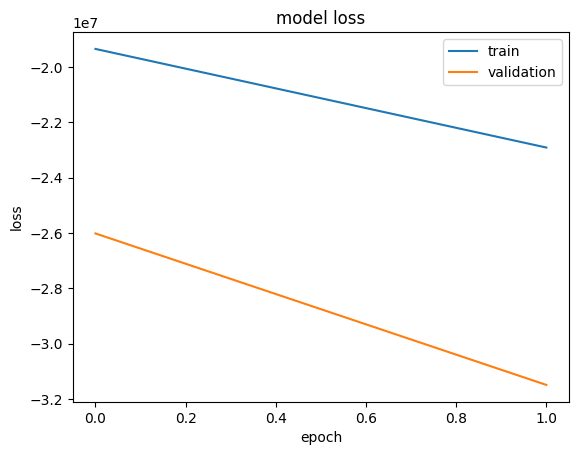

--------------------------------------------------
Média da acurácia: 50.64 %
--------------------------------------------------
Média da validação da acurácia: 48.49 %
--------------------------------------------------
Média do loss: -21134024.00
--------------------------------------------------
Média da validação do loss: -28753007.00


In [ ]:
otimizacao_cinza('adam')

In [ ]:
# Otimizador 'SGD'
otimizacao_cinza('SGD')

Epoch 1/15
224/224 [==============================] - 14s 60ms/step - loss: nan - accuracy: 0.0126 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/15
224/224 [==============================] - 13s 60ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/15
 56/224 [======>.......................] - ETA: 8s - loss: nan - accuracy: 0.0000e+00

In [ ]:
# Otimizador Adagrad
otimizacao_cinza('Adagrad')

In [ ]:
# Otimizador RMSprop
otimizacao_cinza('RMSprop')

In [ ]:
# Otimizador Adadelta
otimizacao_cinza('Adadelta')

In [ ]:
# Otimizador Nadam
otimizacao_cinza('Nadam')

Para um problema de classificação de imagens em gato ou cachorro, uma das arquiteturas de redes neurais mais comuns é a Rede Neural Convolucional (Convolutional Neural Network - CNN). A CNN é amplamente usada em problemas de visão computacional e é especialmente adequada para reconhecimento de imagens.

Uma rede neural convolucional típica pode ter camadas convolucionais que extraem recursos importantes da imagem, seguidas por camadas de pooling que reduzem a dimensão das representações de recursos e camadas totalmente conectadas que realizam a classificação final. A camada de classificação final pode ser composta por uma ou mais unidades neurais, onde cada unidade corresponde a uma classe (por exemplo, gato ou cachorro).

As redes CNNs podem ser treinadas a partir do zero ou podem ser pré-treinadas em grandes conjuntos de dados, como ImageNet. As CNNs pré-treinadas podem ser finetunadas para tarefas específicas, como classificação de imagens de gato ou cachorro.

Outra opção seria utilizar uma arquitetura de rede neural mais simples, como uma Rede Neural Feedforward (Feedforward Neural Network - FFNN), que pode ter uma ou mais camadas ocultas, seguidas por uma camada de saída com duas unidades neurais (uma para gato e outra para cachorro). No entanto, as redes FFNNs podem não ser tão eficazes quanto as redes CNNs para problemas de visão computacional complexos, como reconhecimento de imagens.

# Modelos Pré-Treinados

# VGG16

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Separando os dados de treino e validação
image_size = (32, 32)# era de 180x180
batch_size = 128 # tamanho da amostra que será utilizada em cada etapa de treinamento(128,1280)

treino, validacao = tf.keras.utils.image_dataset_from_directory(
    "PetImages",# arquivo mãe
    validation_split=0.2,
    subset="both",
    seed=11,
    image_size=image_size,
    batch_size=batch_size
)

# Carregar o modelo pré-treinado VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar as camadas do modelo VGG16
for layer in model_vgg16.layers:
    layer.trainable = False

# Adicionar camadas personalizadas ao modelo
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo com seus dados
model.fit(treino, epochs=5, validation_data=validacao)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
147/147 [==============================] - 350s 2s/step - loss: 3.3655 - accuracy: 0.6024 - val_loss: 2.8774 - val_accuracy: 0.5886
Epoch 2/5
147/147 [==============================] - 327s 2s/step - loss: 1.7780 - accuracy: 0.6522 - val_loss: 1.0244 - val_accuracy: 0.7055
Epoch 3/5
147/147 [==============================] - 329s 2s/step - loss: 1.2920 - accuracy: 0.6706 - val_loss: 1.0690 - val_accuracy: 0.6929
Epoch 4/5
147/147 [==============================] - 326s 2s/step - loss: 1.0656 - accuracy: 0.6799 - val_loss: 0.8255 - val_accuracy: 0.7161
Epoch 5/5
147/147 [==============================] - 305s 2s/step - loss: 0.8696 - accuracy: 0.6995 - val_loss: 0.7704 - val_accuracy: 0.7125


# ResNet50V2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

# Separando os dados de treino e validação
image_size = (32, 32)# era de 180x180
batch_size = 128 # tamanho da amostra que será utilizada em cada etapa de treinamento(128,1280)

treino, validacao = tf.keras.utils.image_dataset_from_directory(
    "PetImages",# arquivo mãe
    validation_split=0.2,
    subset="both",
    seed=11,
    image_size=image_size,
    batch_size=batch_size
)

# Carregar o modelo pré-treinado ResNet50V2
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Congelar as camadas do modelo
for layer in base_model.layers:
    layer.trainable = False

# Adicionar camadas personalizadas ao modelo
model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(treino, epochs=5, validation_data=validacao)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.
94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/5
147/147 [==============================] - 106s 677ms/step - loss: 9.2005 - accuracy: 0.5410 - val_loss: 0.6784 - val_accuracy: 0.6000
Epoch 2/5
147/147 [==============================] - 101s 682ms/step - loss: 0.6734 - accuracy: 0.5871 - val_loss: 0.6504 - val_accuracy: 0.6228
Epoch 3/5
147/147 [==============================] - 121s 819ms/step - loss: 0.6612 - accuracy: 0.6042 - val_loss: 0.6454 - val_accuracy: 0.6467
Epoch 4/5
147/147 [==============================] - 103s 696ms/step - loss: 0.6556 - accuracy: 0.6120 - val_loss: 0.6512 - val_accuracy: 0.6431
Epoch 5/5
147/147 [==============================] - 103s 697ms/step - loss: 0.6551 - accuracy: 0.6063 - val_loss: 0.6441 - val_accuracy: 0.6437


# Inception

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Separando os dados de treino e validação
image_size = (75, 75)# era de 180x180
batch_size = 128 # tamanho da amostra que será utilizada em cada etapa de treinamento(128,1280)

treino, validacao = tf.keras.utils.image_dataset_from_directory(
    "PetImages",# arquivo mãe
    validation_split=0.2,
    subset="both",
    seed=11,
    image_size=image_size,
    batch_size=batch_size
)

# Carregar o modelo pré-treinado VGG16
model_InceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Congelar as camadas do modelo VGG16
for layer in model_InceptionV3.layers:
    layer.trainable = False

# Adicionar camadas personalizadas ao modelo
model = Sequential()
model.add(model_InceptionV3)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo com seus dados
model.fit(treino, epochs=5, validation_data=validacao)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.
87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/5
147/147 [==============================] - 238s 2s/step - loss: 6.0518 - accuracy: 0.5858 - val_loss: 0.7631 - val_accuracy: 0.6002
Epoch 2/5
147/147 [==============================] - 274s 2s/step - loss: 0.6966 - accuracy: 0.6319 - val_loss: 0.7330 - val_accuracy: 0.6059
Epoch 3/5
147/147 [==============================] - 313s 2s/step - loss: 0.6504 - accuracy: 0.6482 - val_loss: 0.7083 - val_accuracy: 0.6177
Epoch 4/5
147/147 [==============================] - 269s 2s/step - loss: 0.6300 - accuracy: 0.6582 - val_loss: 0.7177 - val_accuracy: 0.6226
Epoch 5/5
147/147 [==============================] - 268s 2s/step - loss: 0.6133 - accuracy: 0.6692 - val_loss: 0.7153 - val_accuracy: 0.6145


# Escolhendo o modelo para treinar na GPU

In [ ]:
import tensorflow as tf

# Verifica se a GPU está disponível
print("Disponibilidade de GPU:", tf.test.is_gpu_available())

# Mostra o nome da GPU, se disponível
if tf.test.is_gpu_available():
    gpu_name = tf.test.gpu_device_name()
    print("Nome da GPU:", gpu_name)

Disponibilidade de GPU: True
Nome da GPU: /device:GPU:0


Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.
Epoch 1/20
147/147 [==============================] - 149s 999ms/step - loss: 0.8875 - accuracy: 0.9499 - val_loss: 0.2568 - val_accuracy: 0.9658
Epoch 2/20
147/147 [==============================] - 130s 871ms/step - loss: 0.0584 - accuracy: 0.9885 - val_loss: 0.2418 - val_accuracy: 0.9682
Epoch 3/20
147/147 [==============================] - 145s 979ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.2490 - val_accuracy: 0.9663
Epoch 4/20
147/147 [==============================] - 131s 879ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.2383 - val_accuracy: 0.9688
Epoch 5/20
147/147 [==============================] - 130s 877ms/step - loss: 8.8440e-04 - accuracy: 0.9999 - val_loss: 0.2375 - val_accuracy: 0.9692
Epoch 6/20
147/147 [==============================] - 145s 980ms/step - loss: 7.1807e-04 - accuracy: 0.9999 - val_loss: 0.2370 - val_accuracy: 0.9688
Epoch 7/2

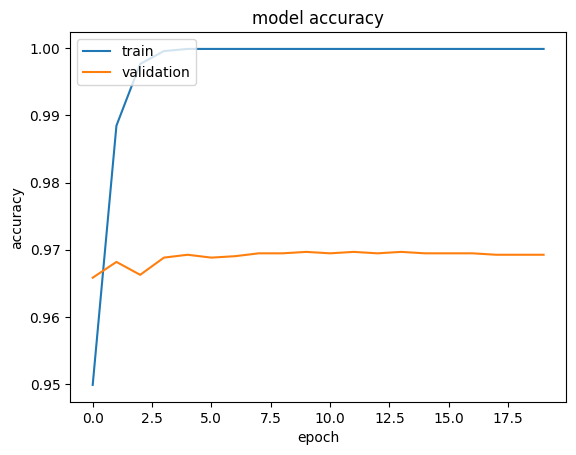

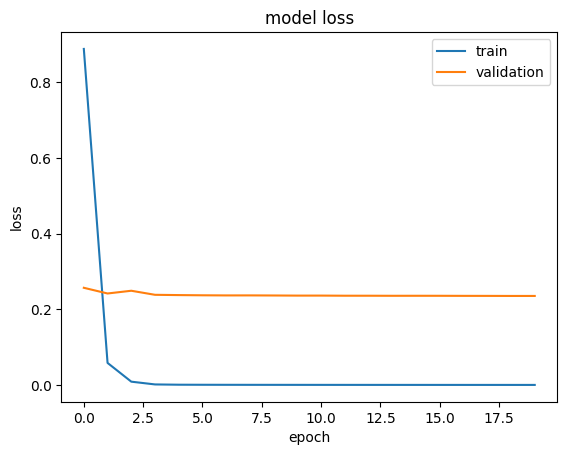

--------------------------------------------------
Média da acurácia: 99.67 %
--------------------------------------------------
Média da validação da acurácia: 96.90 %
--------------------------------------------------
Média do loss: 0.05
--------------------------------------------------
Média da validação do loss: 0.24


In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Separando os dados de treino e validação
image_size = (250, 250)# tamanho das imagens
batch_size = 128 # tamanho da amostra que será utilizada em cada etapa de treinamento(128)

treino, validacao = tf.keras.utils.image_dataset_from_directory(
    "PetImages",# arquivo mãe
    validation_split=0.2,
    subset="both",
    seed=11,
    image_size=image_size,
    batch_size=batch_size
)

# Carregar o modelo pré-treinado VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

# Congelar as camadas do modelo VGG16
for layer in model_vgg16.layers:
    layer.trainable = False

# Adicionar camadas personalizadas ao modelo
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

inicio=time.time()

# Treinar o modelo com seus dados
hist = model.fit(treino, epochs=20, validation_data=validacao)
print(' ')
print(' ')
final = time.time()
print(f'Tempo de execução: {final-inicio:.0f} segundos ==> {((final-inicio)/60):.0f} minutos')

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

print('-'*50)
acuracia = hist.history['accuracy']
val_acu = hist.history['val_accuracy']
loss = hist.history['loss']
val_los = hist.history['val_loss']
media_acuracia = sum(acuracia)/ len(acuracia)
media_val_acu = sum(val_acu)/ len(val_acu)
media_loss = sum(loss)/ len(loss)
media_val_los = sum(val_los)/ len(val_los)
print(f'Média da acurácia: {(media_acuracia*100):.2f} %')
print('-'*50)
print(f'Média da validação da acurácia: {(media_val_acu*100):.2f} %')
print('-'*50)
print(f'Média do loss: {media_loss:.2f}')
print('-'*50)
print(f'Média da validação do loss: {media_val_los:.2f}')

Existem várias métricas que podem ser usadas para avaliar o desempenho de um modelo de classificação binária. Algumas das métricas mais comuns incluem:

Precision (Precisão): Mede a proporção de verdadeiros positivos em relação ao total de amostras classificadas como positivas. É útil quando o foco está em minimizar os falsos positivos.

Recall (Revocação ou Sensibilidade): Mede a proporção de verdadeiros positivos em relação ao total de amostras verdadeiramente positivas. É útil quando o foco está em minimizar os falsos negativos.

F1 Score: É a média harmônica da precisão e da revocação. É uma métrica geralmente utilizada quando há um desequilíbrio entre as classes.

AUC-ROC (Área sob a curva da característica de operação do receptor): É uma métrica que representa a capacidade do modelo de classificar corretamente as amostras positivas e negativas em diferentes limiares. É útil para problemas de classificação binária com dados desbalanceados.

AUC-PR (Área sob a curva da precisão e revocação): É uma métrica semelhante ao AUC-ROC, mas considera a precisão e a revocação em vez das taxas de verdadeiros positivos e falsos positivos.

Matriz de Confusão: Uma tabela que resume as previsões do modelo em relação aos rótulos verdadeiros, mostrando os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Log Loss (Entropia Cruzada Binária): Uma métrica de perda que avalia a probabilidade prevista em relação ao rótulo verdadeiro. É útil para tarefas de classificação probabilística.

Specificity (Especificidade): Mede a proporção de verdadeiros negativos em relação ao total de amostras verdadeiramente negativas. É o oposto do recall.

Acurácia Balanceada: É a média das sensibilidades (recall) de cada classe. É útil quando há desbalanceamento entre as classes.

# Calculando outra métricas para validação do modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import numpy as np

# Fazendo previsões no conjunto de validação
y_pred_probs = model.predict(validacao)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Convertendo o conjunto de validação para arrays numpy para obter os rótulos verdadeiros
y_true = []
for _, label in validacao:
    y_true.extend(label.numpy())
y_true = np.array(y_true)

# Calculando as métricas
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
roc_auc = roc_auc_score(y_true, y_pred_probs)
average_precision = average_precision_score(y_true, y_pred_probs)
confusion = confusion_matrix(y_true, y_pred_classes)

# Imprimindo os resultados
print('')
print("Resultados da Avaliação do Modelo:")
print("-" * 40)
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')
print(f'AUC-PR: {average_precision:.4f}')
print("-" * 40)
print('Matriz de Confusão:')
print(confusion)

37/37 [==============================] - 26s 702ms/step

Resultados da Avaliação do Modelo:
----------------------------------------
Acurácia: 0.9692
Precisão: 0.9703
Revocação: 0.9669
F1 Score: 0.9686
AUC-ROC: 0.9957
AUC-PR: 0.9944
----------------------------------------
Matriz de Confusão:
[[2317   68]
 [  76 2221]]


Acurácia: 0.9692 - A acurácia é a proporção de previsões corretas em relação ao total de amostras. Neste caso, o modelo obteve uma acurácia alta, indicando que aproximadamente 96,92% das previsões foram corretas no conjunto de validação.

Precisão: 0.9703 - A precisão é a proporção de verdadeiros positivos (TP) em relação ao total de previsões positivas (TP + FP). Neste caso, a precisão é alta, indicando que cerca de 97,03% das previsões positivas do modelo foram realmente verdadeiras positivas.

Revocação (Recall): 0.9669 - A revocação é a proporção de verdadeiros positivos (TP) em relação ao total de amostras positivas (TP + FN). Neste caso, a revocação também é alta, indicando que o modelo conseguiu identificar aproximadamente 96,69% das amostras positivas corretamente.

F1 Score: 0.9686 - O F1 Score é uma média harmônica entre a precisão e a revocação. Ele equilibra essas duas métricas e é útil quando há um desequilíbrio nas classes. Neste caso, o F1 Score é alto, o que mostra que o modelo é bom em encontrar um equilíbrio entre precisão e revocação.

AUC-ROC: 0.9957 - A área sob a curva ROC (Receiver Operating Characteristic) é uma medida da capacidade discriminativa do modelo em distinguir entre as duas classes. Quanto mais próximo de 1, melhor o modelo é em fazer essa distinção. Neste caso, o valor de 0.9957 indica que o modelo tem uma excelente capacidade discriminativa.

AUC-PR: 0.9944 - A área sob a curva da Precision-Recall (PR) é outra medida da capacidade discriminativa do modelo, especialmente quando há um desequilíbrio nas classes. Um valor mais próximo de 1 indica melhor desempenho do modelo. Neste caso, o valor de 0.9944 mostra que o modelo tem uma ótima capacidade discriminativa, mesmo com o desequilíbrio nas classes.

Matriz de Confusão:
[[2317   68]
 [  76 2221]]
A matriz de confusão mostra os resultados das previsões do modelo em relação aos rótulos verdadeiros. Neste caso, o modelo fez 2317 previsões verdadeiro-negativas (TN), 2221 previsões verdadeiro-positivas (TP), 68 previsões falsos-positivas (FP) e 76 previsões falsos-negativas (FN). Esses valores mostram como o modelo está se saindo em relação a cada classe.